# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [958]:
# Installing the libraries with the specified version.
# !pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [959]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## Data Overview

- Observations
- Sanity checks

In [960]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [961]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INNHotelsGroup.csv')
dataset.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   
5                                     0           115.00000   
6                                     0           107.55000   
7                                     0           105.61000   
8                                     0            96.90000   
9                                     0           133.44000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                 

In [962]:
# checking number of rows and columns
dataset.shape

(36275, 19)

In [963]:
# checking information, data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [964]:
# checking null values
dataset.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [965]:
# checking duplicates
dataset.duplicated().sum()

0

In [966]:
# copying data to another variable to avoid any changes to original data
data = dataset.copy()

In [967]:
# booking is unique and irrelavant for analysis
data = data.drop('Booking_ID', axis=1)

In [968]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

* The dataset has 36275 rows and 19 columns.
* Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status are of object type while rest columns are numeric in nature.
* There are no null values in the dataset.
* There are no duplicate values in the data.
* The number of adults ranges from 0 to 4, which is usual.
* The maximum value in the number of children column is 10, which is a bit unusual and might require a check.
* The range of the number of weeks and weekend nights seems fine. Though 7 weekends might be a very long stay.
* At least 75% of the customers do not require car parking space.
* On average the customers book 85 days in advance. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.
* We have two years of data, 2017 and 2018.
* At least 75% of the customers are not repeating customers.
* The average price per room is 103 euros. There's a huge difference between the 75th percentile and the maximum value which indicates there might be outliers present in this column.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [969]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

### Univariate Analysis

In [970]:
# function to create boxplot and histogram combined
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color='blue'
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on average price per room

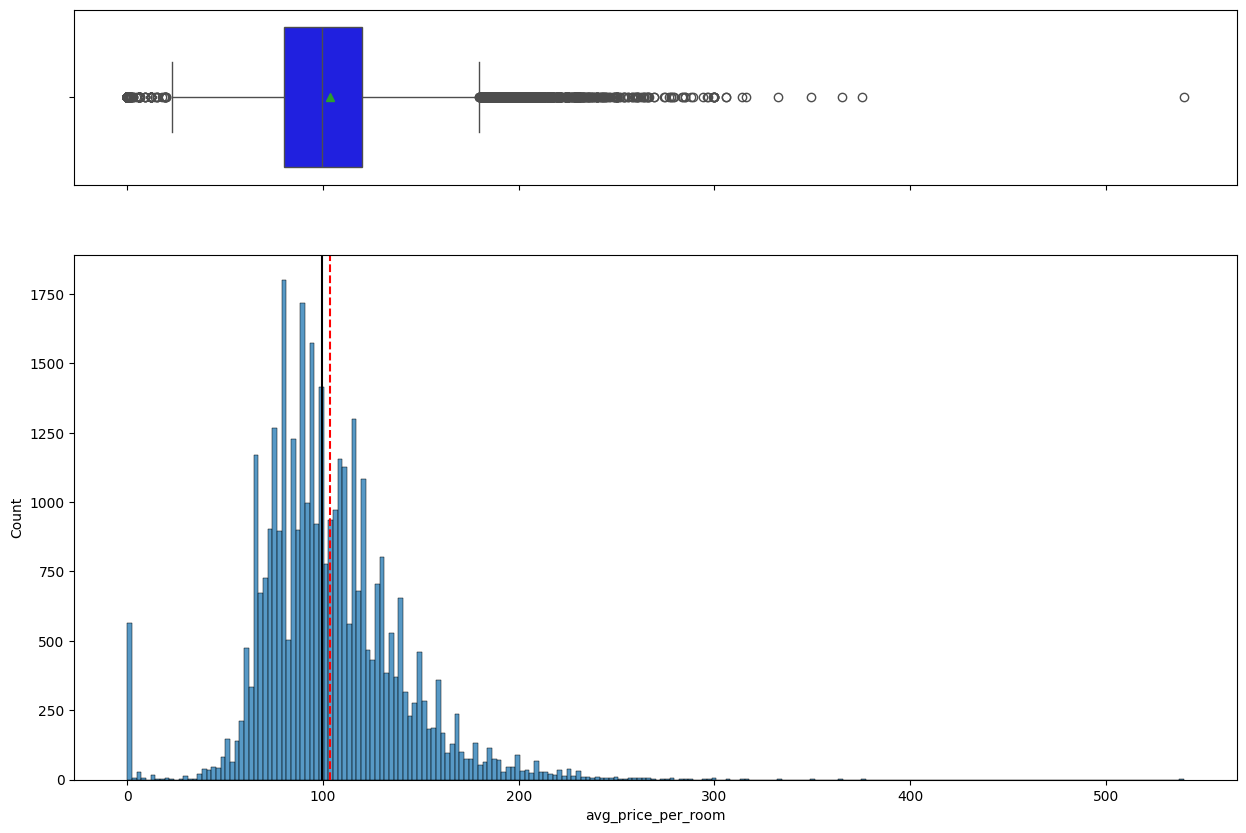

In [971]:
histogram_boxplot(data, 'avg_price_per_room')

* The distribution of average price per room is skewed to right. There are outliers on both sides.
* The average price of a room is around ~100 euros.
* There is 1 observation where the average price of the room is more than 500 euros. We will clip this to the upper whisker (Q3 + 1.5 * IQR).
* Some rooms have a price equal to 0 (needs to be checked).

In [972]:
data[data["avg_price_per_room"] == 0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

In [973]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

* There are indeed a few rooms which have a price equal to 0 means given free.
* In the market segment column, many values looks complementary.
* The rooms booked online must be a part of some promotional campaign done by the hotel.
* we will treat the extreme outliers

In [974]:

# Calculating the 25th and 75th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)
Q3 = data['avg_price_per_room'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [975]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

Observations on lead time

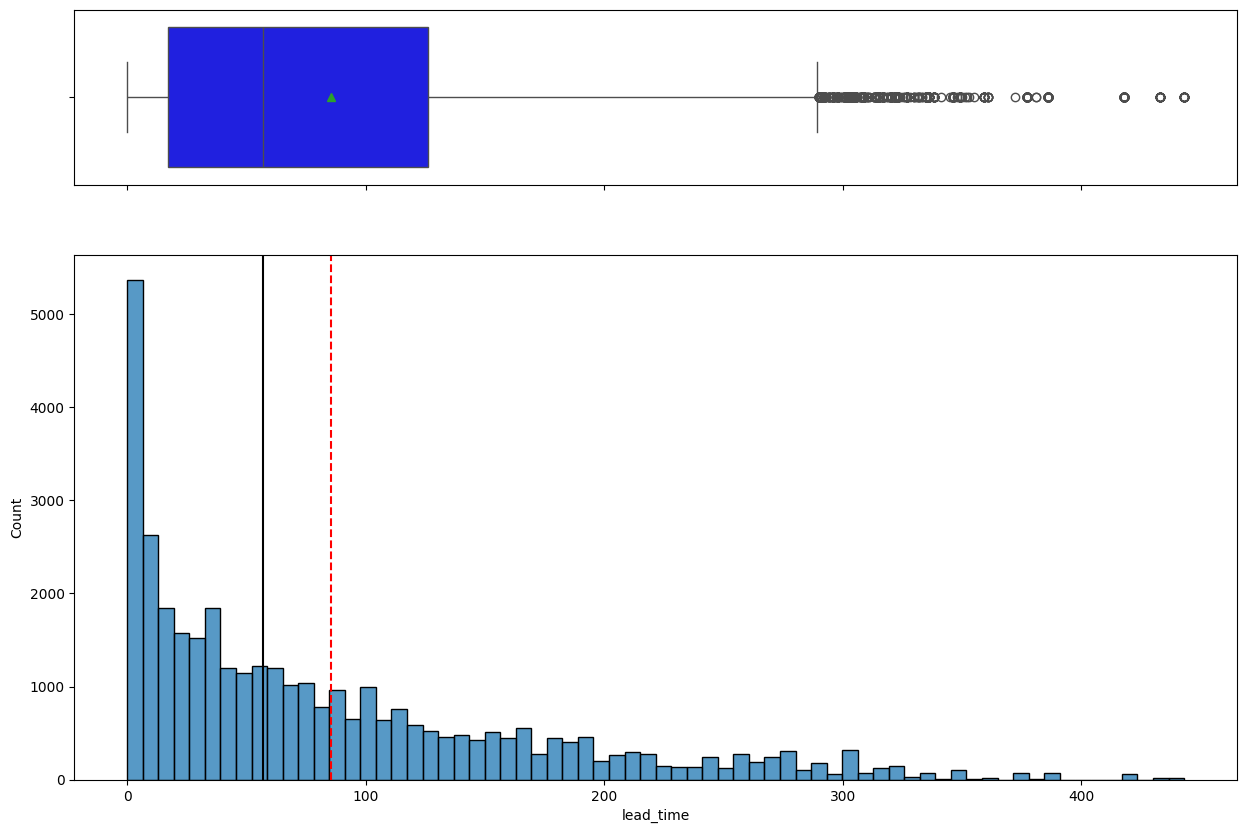

In [976]:
histogram_boxplot(data, 'lead_time')

* majority of guests have made their booking on the same day of arrival as well (at day 0)
The distribution of lead time is right-skewed, and there are many outliers.
Surprisngly, some customers made booking around 100 - 500 days in advance. seems outliers

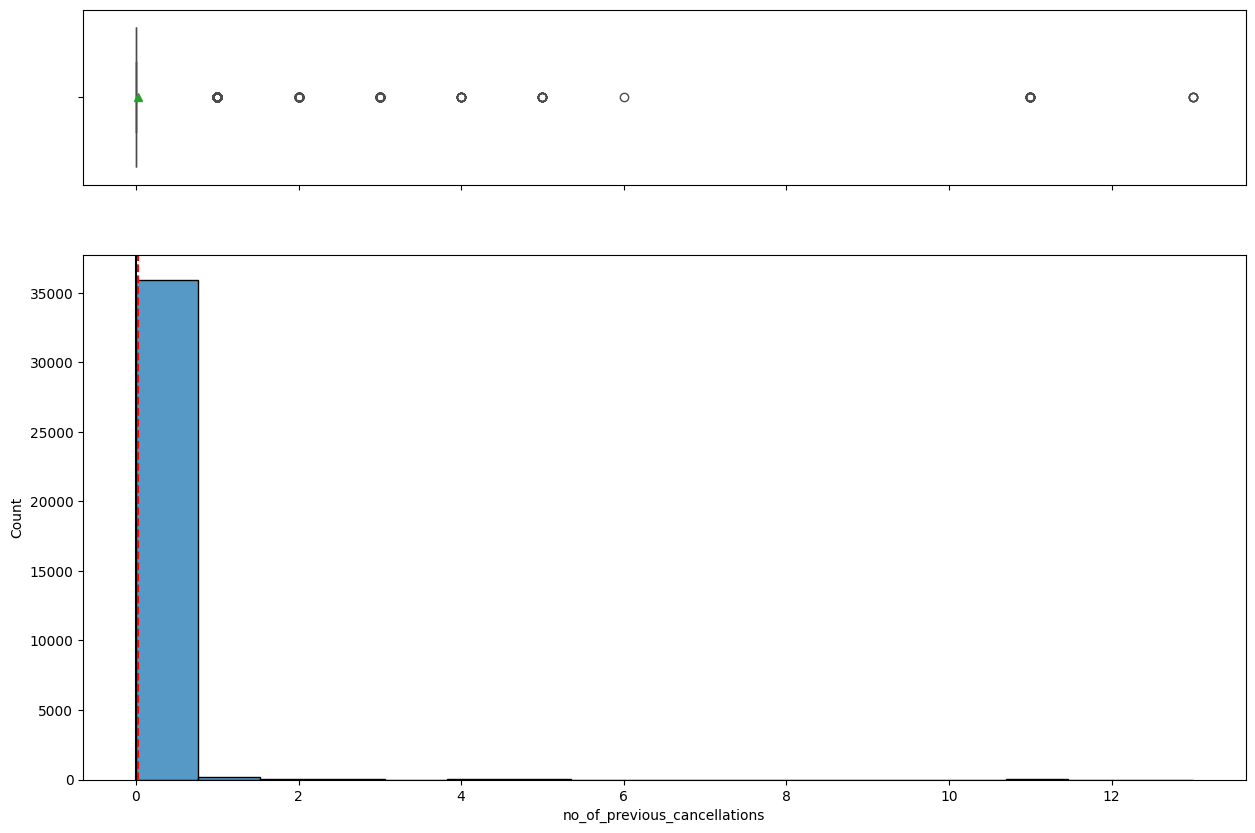

In [977]:
histogram_boxplot(data, 'no_of_previous_cancellations')

Observation: most of the guests canceled one time previously, however there are outliers.

Observations on number of previous bookings not canceled

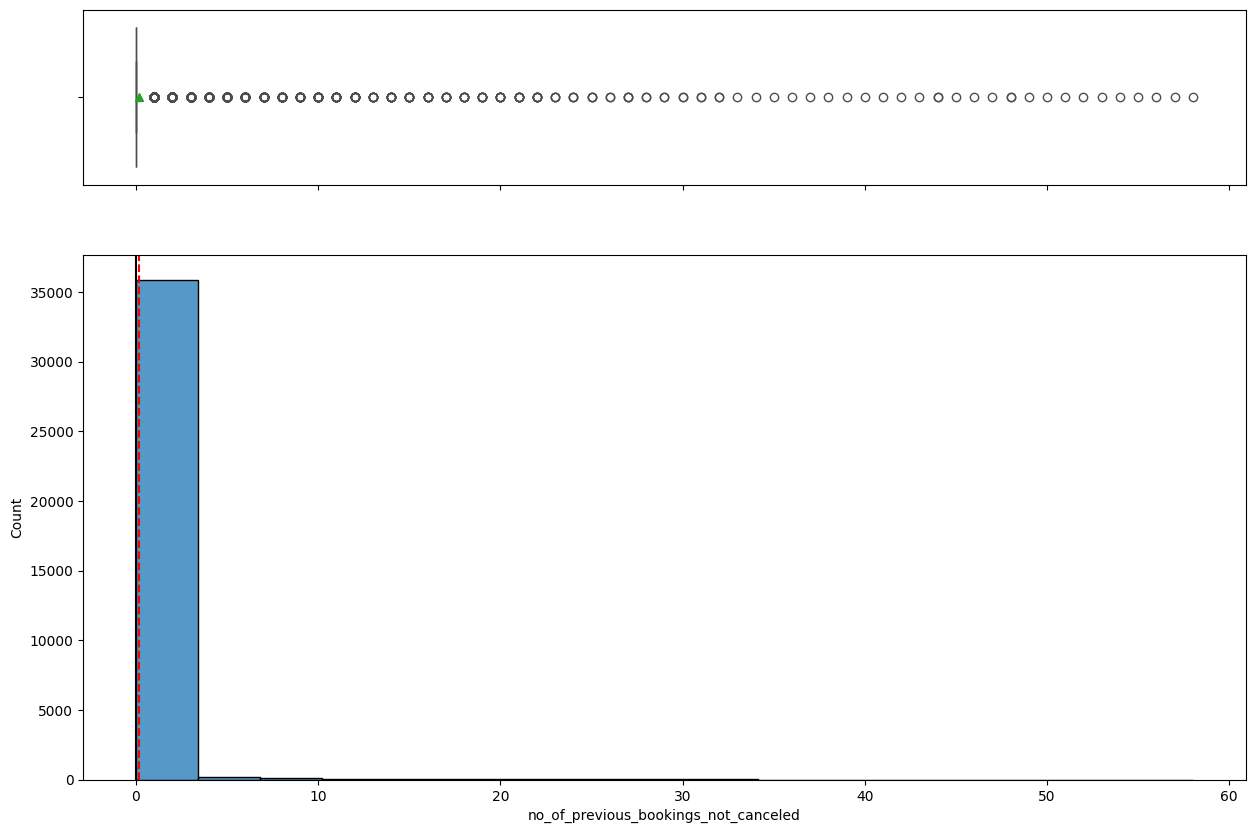

In [978]:
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

Observation: very few customers not canceled more than one time previously

Observations on number of special requests

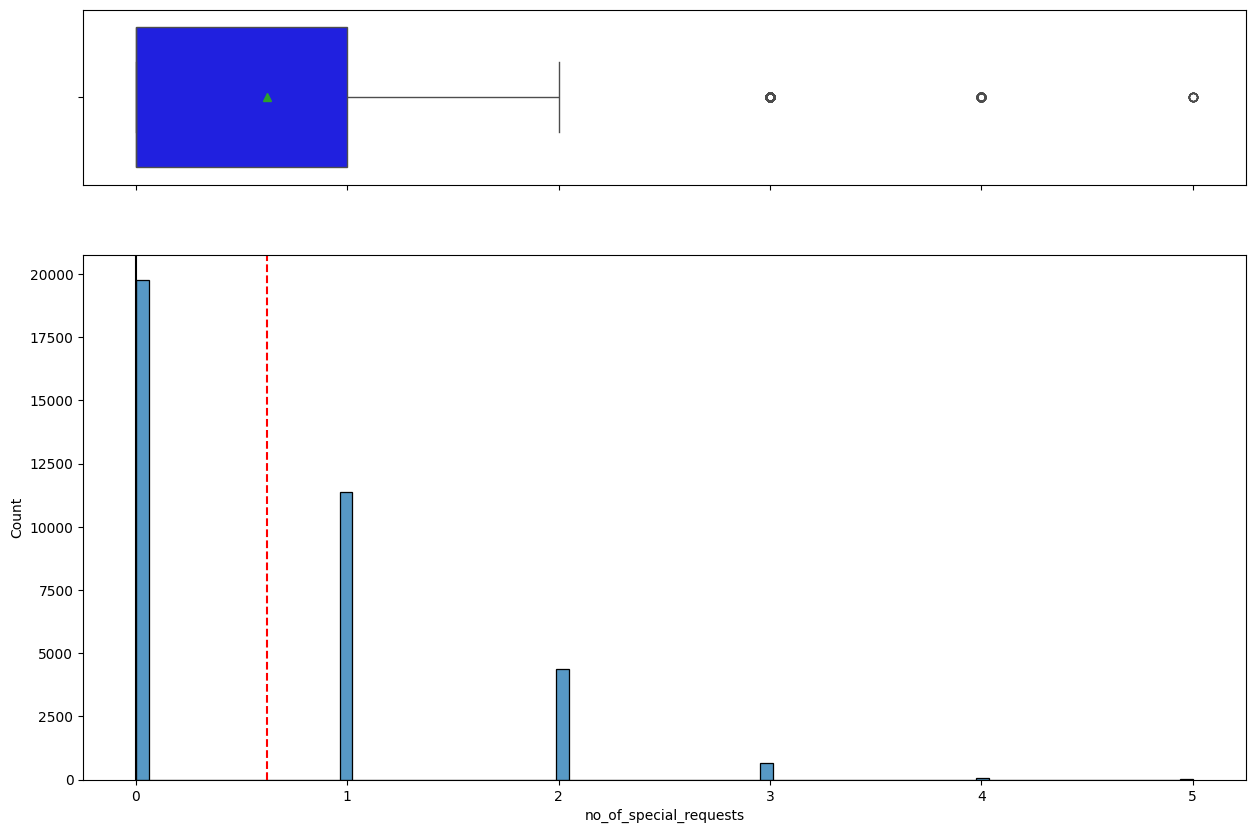

In [979]:
histogram_boxplot(data, 'no_of_special_requests')

Observation: Most of the customers no special requests, more speacial requests decrease the count

Observations on number of week nights

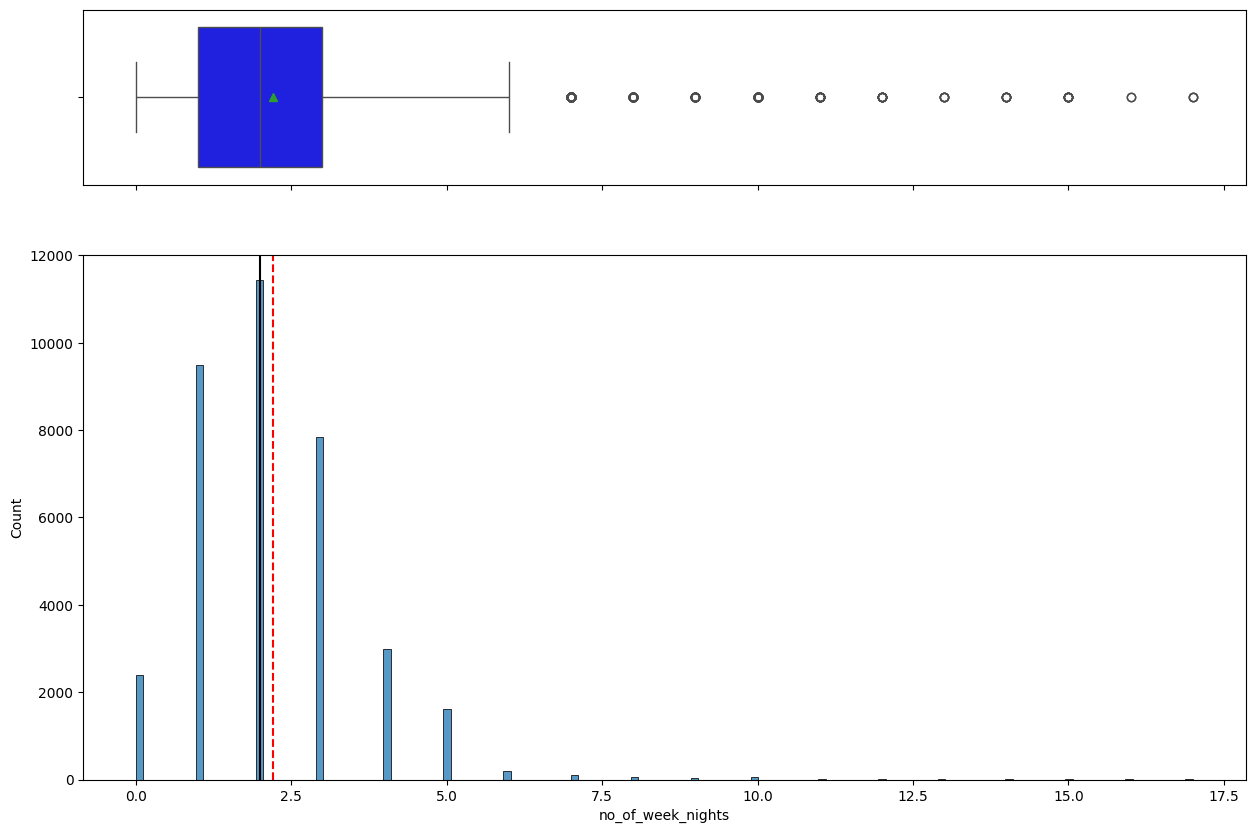

In [980]:
histogram_boxplot(data, 'no_of_week_nights')

Observation: The majority of values cluster around 2-3 week nights, as shown by the concentration of data, however there are week nights upto 17.

Observation on number of weekend nights

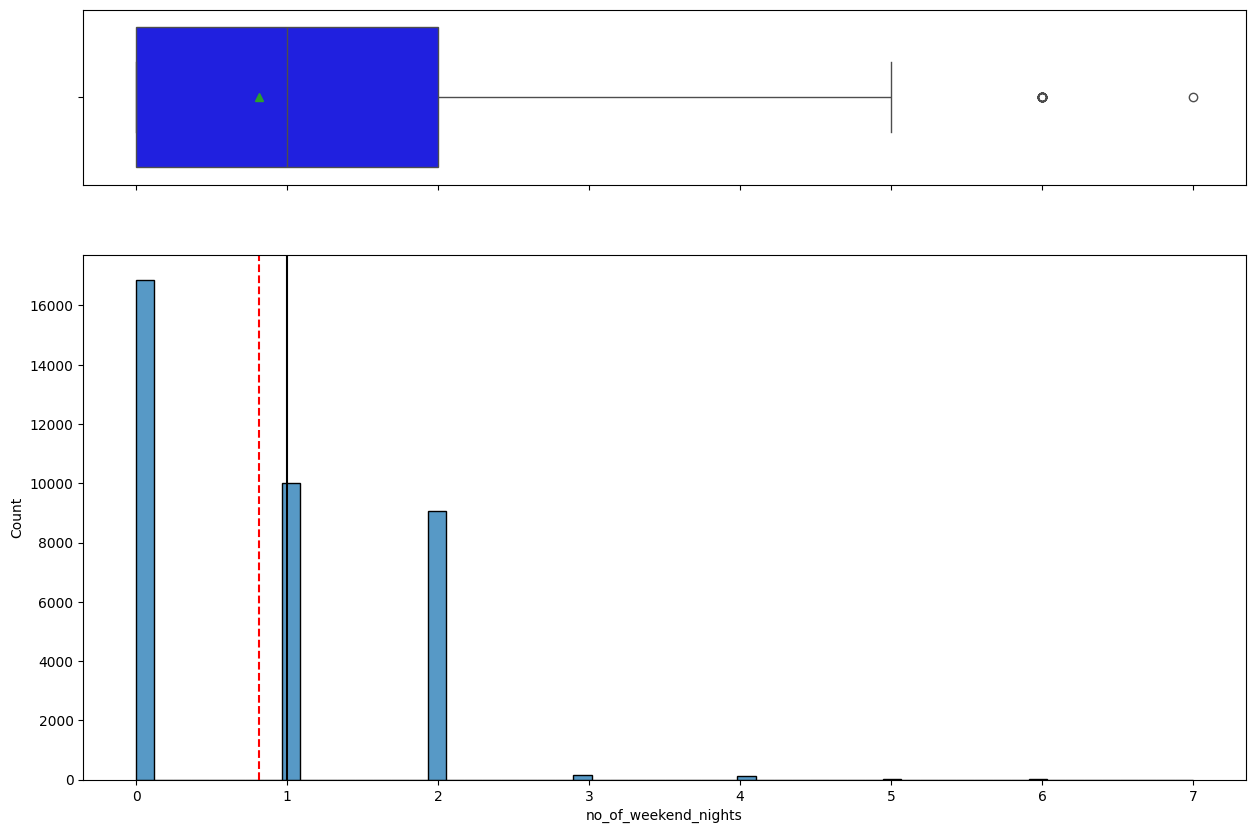

In [981]:
histogram_boxplot(data, 'no_of_weekend_nights')

Observation: Most of the customers are centered around 0 or 1 weekend night However there are customers upto 7 weekend nights

Observation on required car parking space

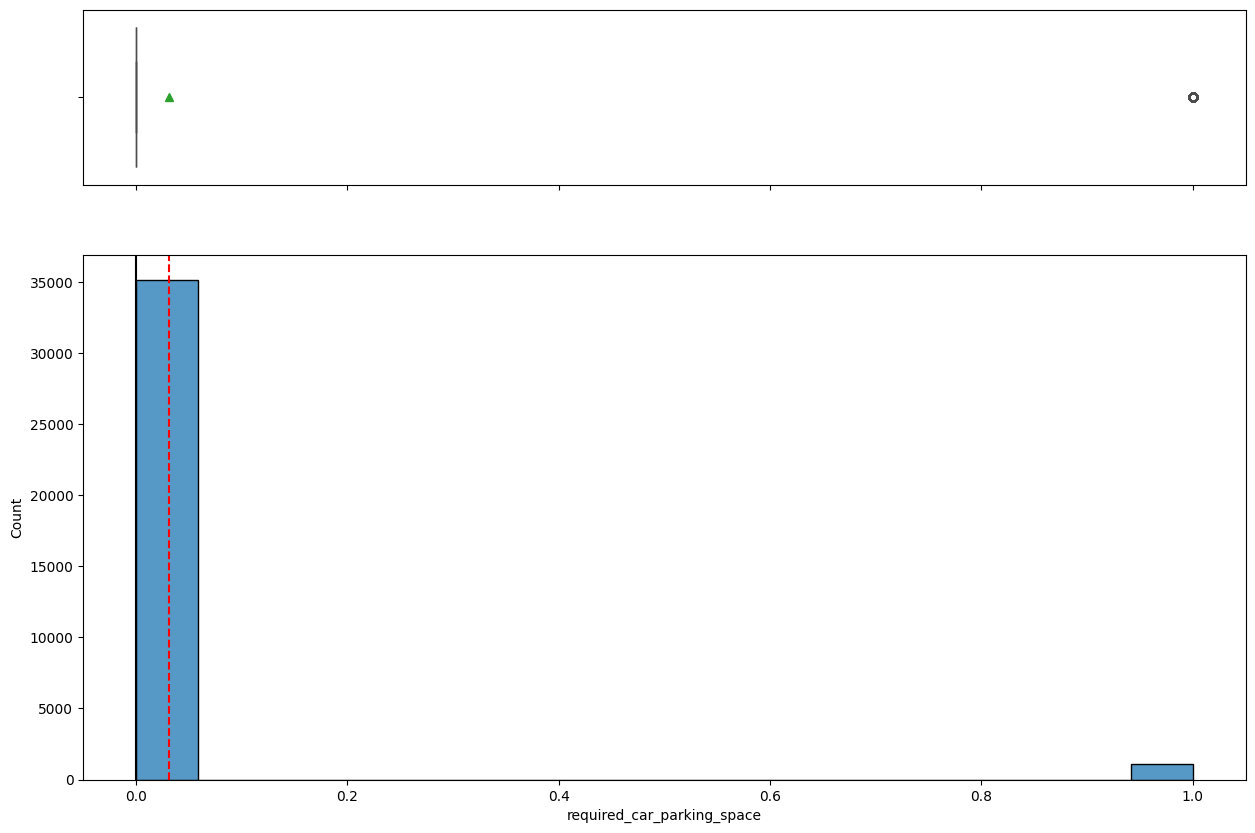

In [982]:
histogram_boxplot(data, 'required_car_parking_space')

Observation: most of the customers do not need car parking space

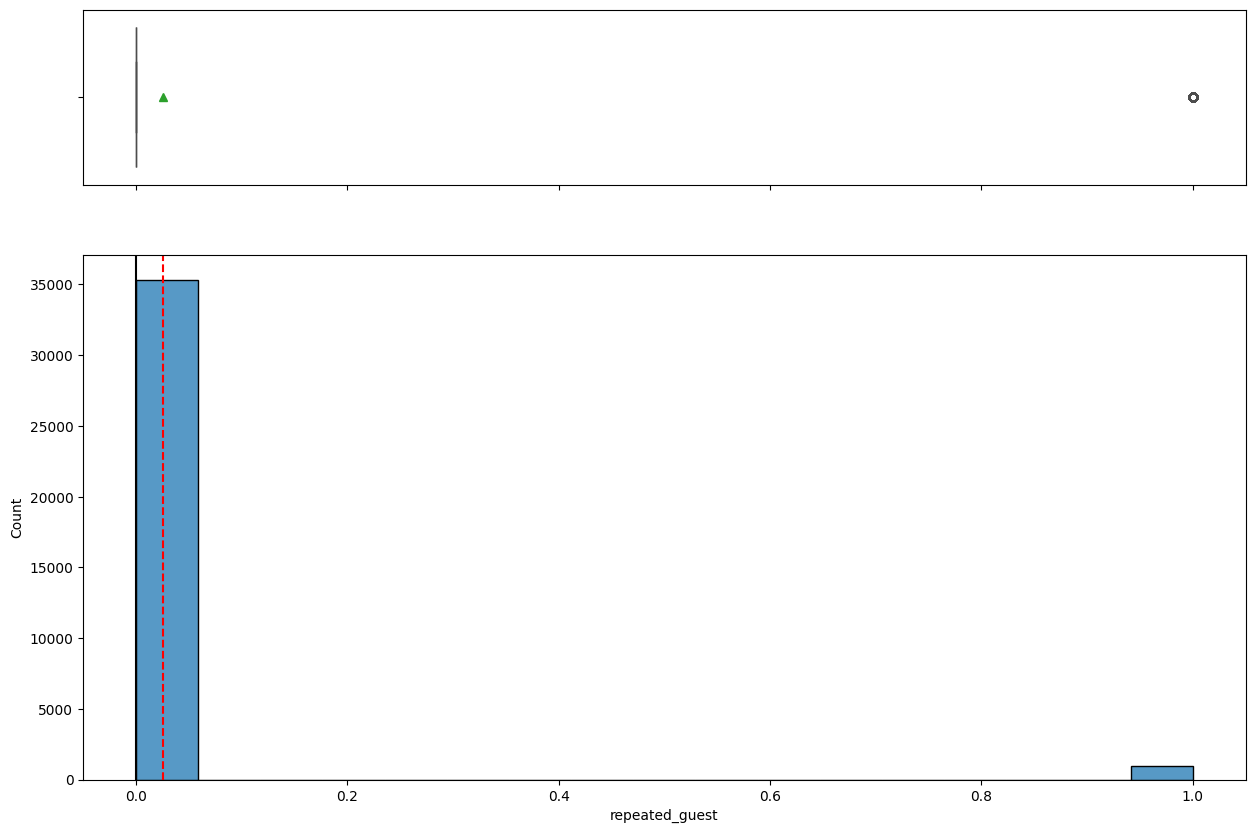

In [983]:
#Observation on repeated guests
histogram_boxplot(data, 'repeated_guest')

Observation:  most of the customers are not repeated guests

Observation on number of adults

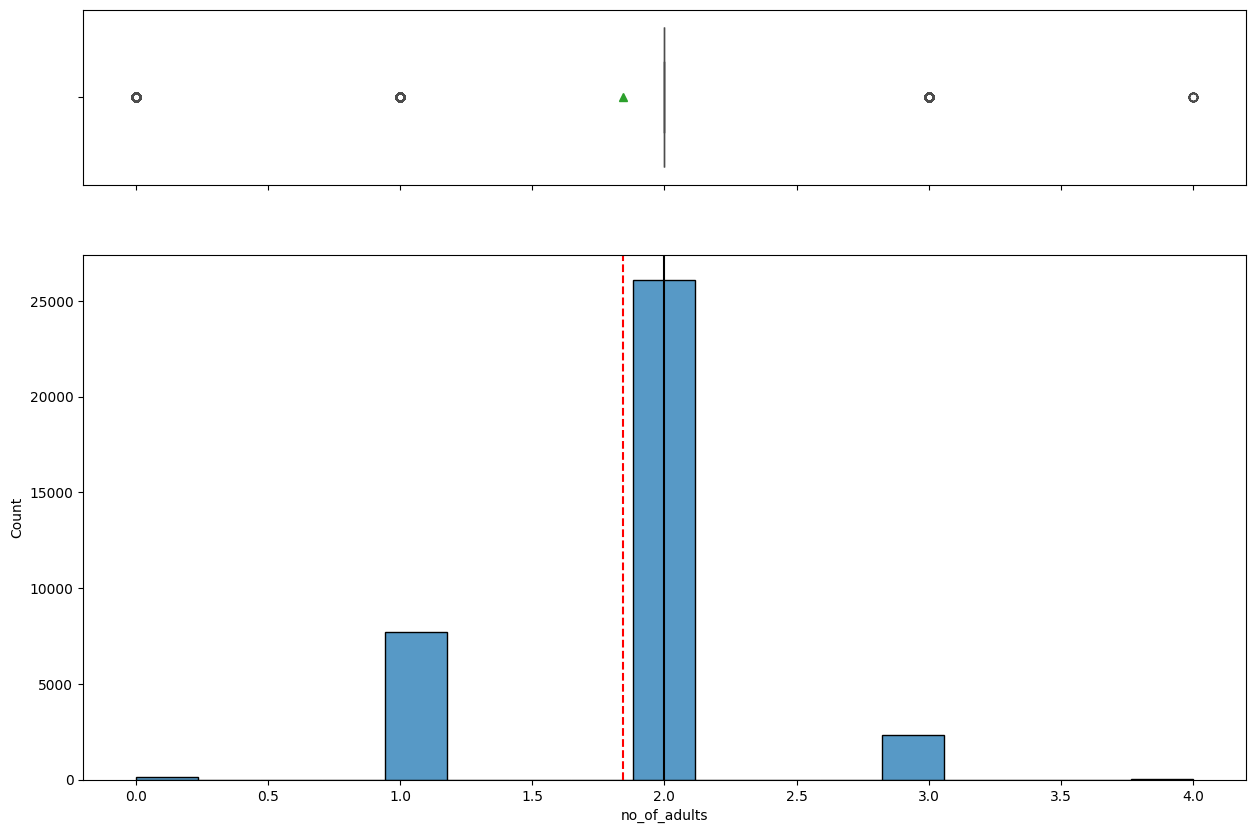

In [984]:
histogram_boxplot(data, 'no_of_adults')

Observation: Most bookings involve 2 adults, which is a common default value customers are couples most of the time.

In [985]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

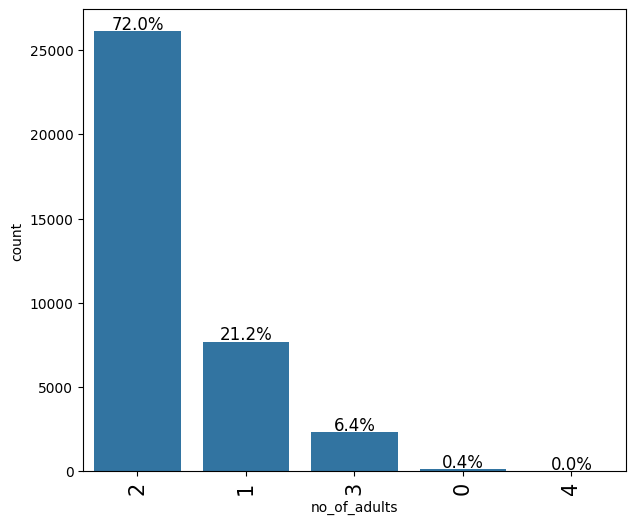

In [986]:
labeled_barplot(data, 'no_of_adults', perc=True)

Observation on number of aduts: 72% of the bookings were made for 2 adults, 21% of the bookings were made for 1 adult. Meaning, that the hotel may be an attractive place for couples and single travelers.

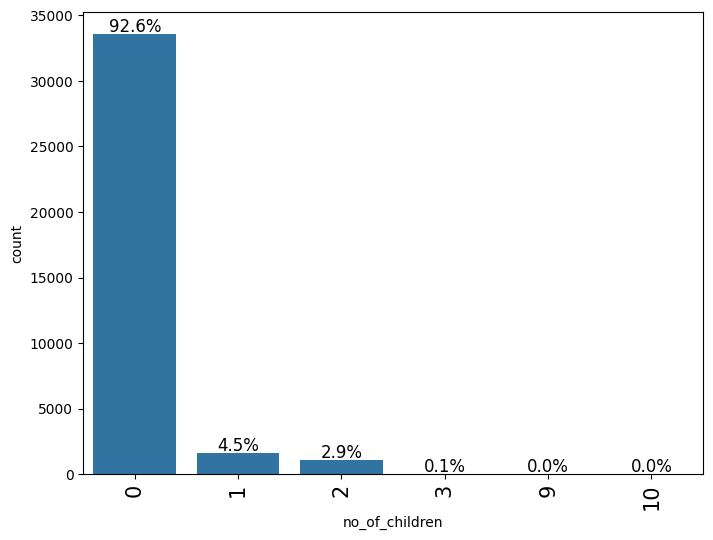

In [987]:
labeled_barplot(data, 'no_of_children', perc=True)

* 92.6 % of the customers didn't make reservations for children.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely.
* We will replace these values with the maximum value of 3 children.

In [988]:
data['no_of_children'] = data['no_of_children'].replace([9, 10], 3)

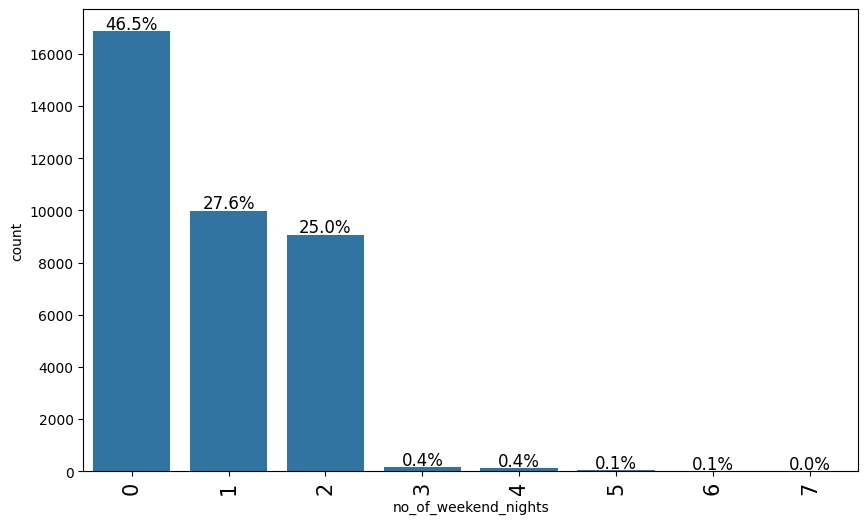

In [989]:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

Observations:
* 46.5% of the customers do not plan to spend the weekend in the hotel.
* The percentage of customers planning to spend 1 or 2 weekends in the hotel is almost the same.

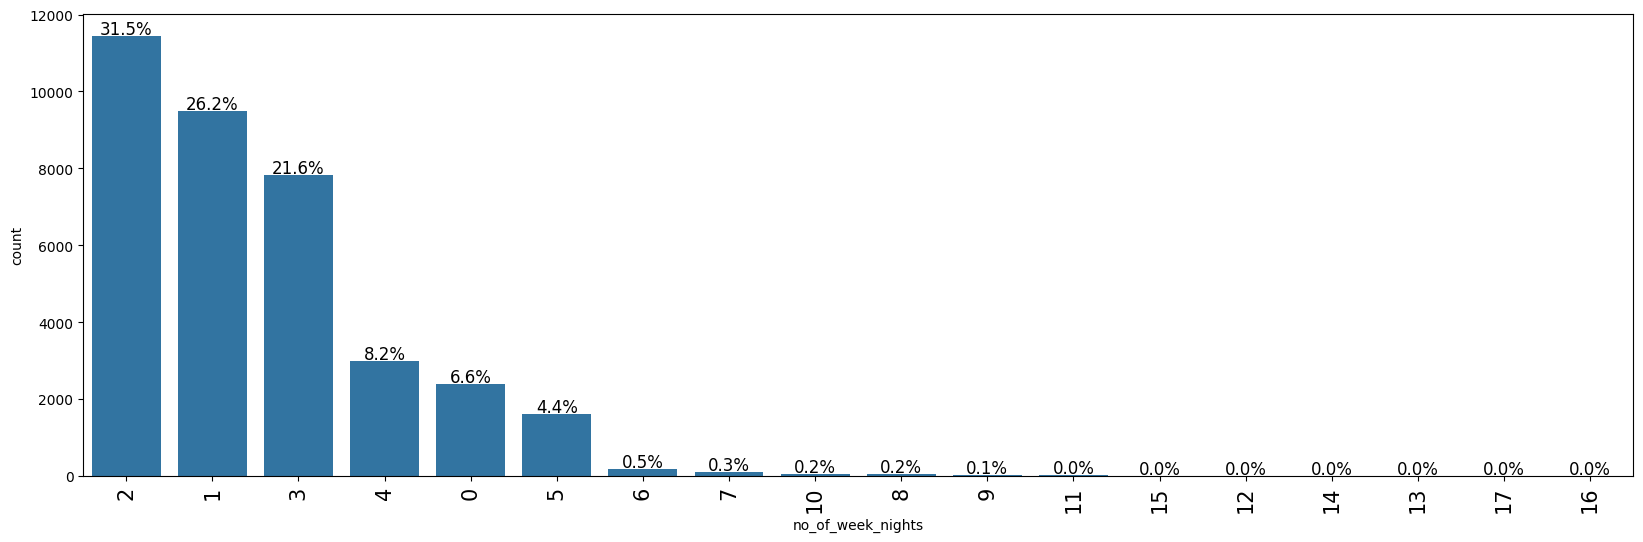

In [990]:
labeled_barplot(data, 'no_of_week_nights', perc=True)

Observations:
* The most frequent number of weeknights is 2 (31.5%), followed by 1 night (26.2%), and 3 nights (21.6%) totaling 79% of data.
* There are some unusual counts, such as 10, 11, 12, 13, etc., but their occurrences are extremely low (close to 0%).

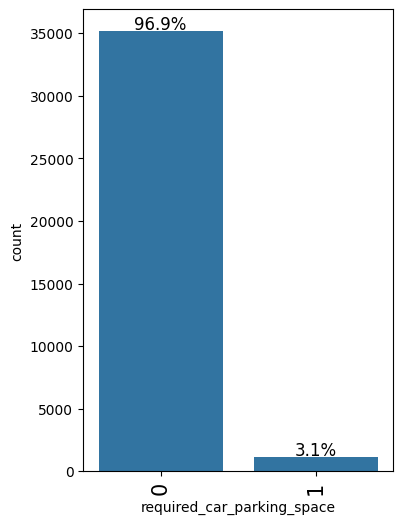

In [991]:
# customers require car parking space
labeled_barplot(data, 'required_car_parking_space', perc=True)

Observation: 96.9% customers do not need car parking space.

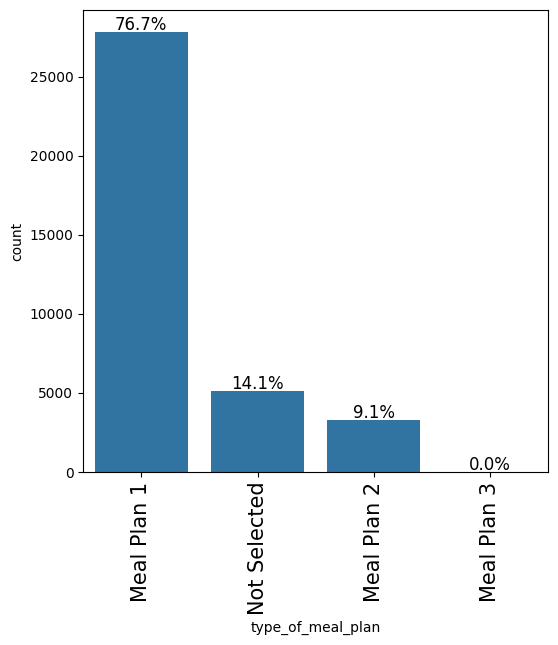

In [992]:
# meal plan preferance
labeled_barplot(data, 'type_of_meal_plan', perc=True)

Observation: Most of the customers select "Meal Plan 1" which should be breakfast.

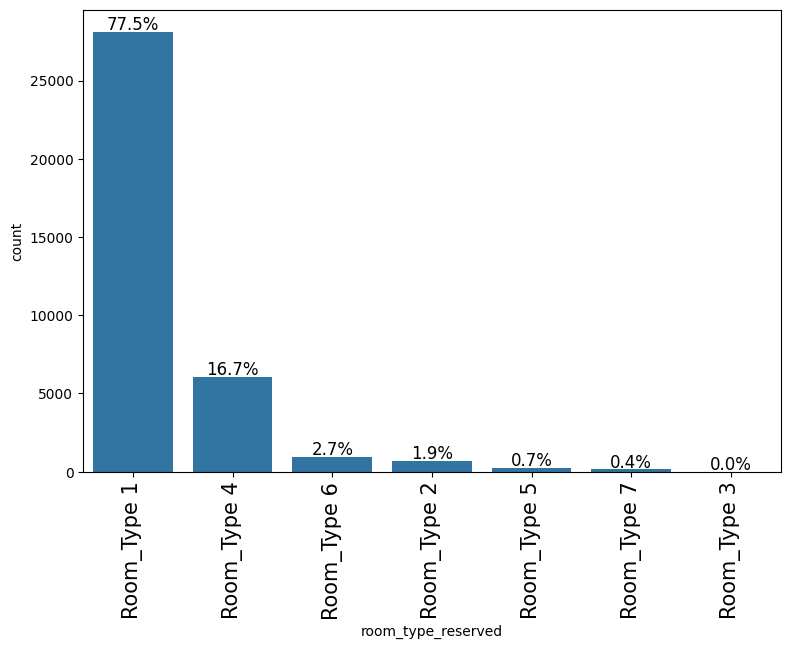

In [993]:
# Room type preferance
labeled_barplot(data, 'room_type_reserved', perc=True)

Observations:
* 77.5% of guests reserved "Room_Type 1," making it the overwhelmingly dominant room type.
* This high percentage suggests that "Room_Type 1" is likely the default or preferred option, either because of cost, availability, or customer preference.
* Room type 4 is second highest choice.

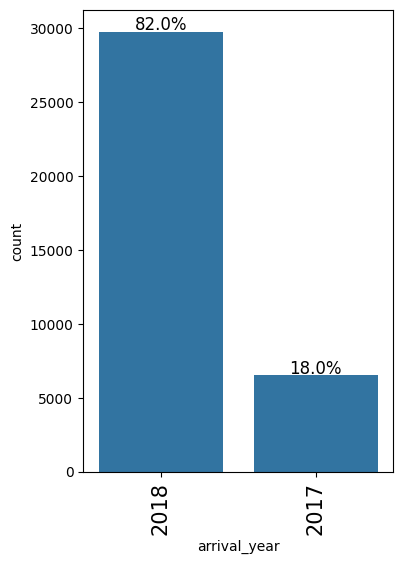

In [994]:
# Arrival year distribution
labeled_barplot(data, 'arrival_year', perc=True)

Observation: most of the customers booked for 2018, may be there were more promotions in this year.

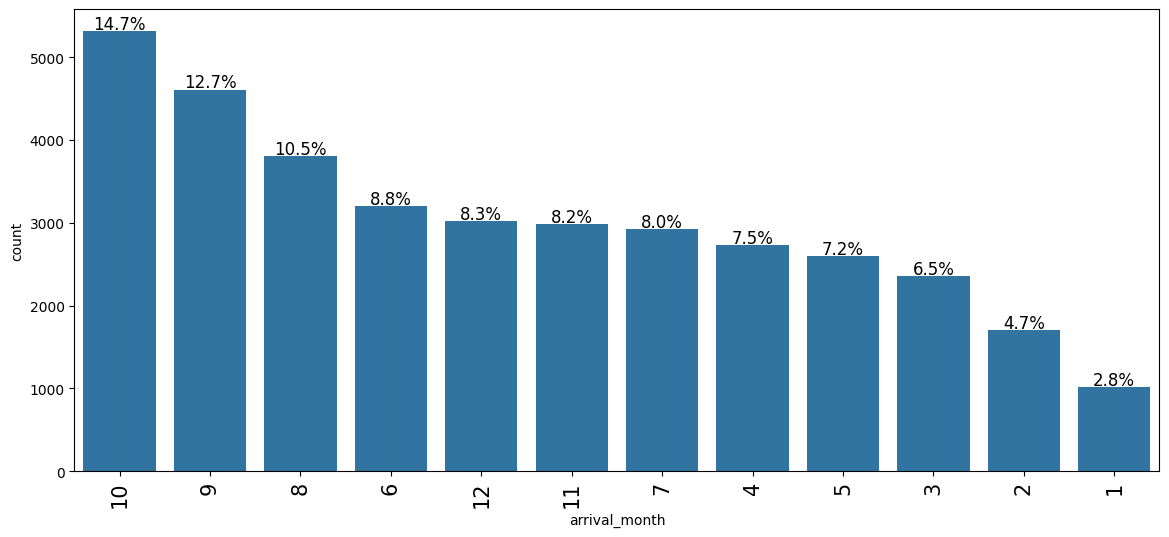

In [995]:
# Arrival month distribution
labeled_barplot(data, 'arrival_month', perc=True)

Observations:
* Seasonality: The data shows clear seasonality in booking behavior, with a peak in the late summer to early fall (August to October) and a dip in the winter months (January and February). Understanding these trends could help in resource planning and marketing strategies, such as offering promotions during slower months.
* Holiday and Vacation Impact: The higher demand in October and the surrounding months could be driven by holiday periods, such as school holidays or specific events that attract travelers during these times.
* Business Insight: To balance out the seasonal demand, businesses could introduce promotions or special packages for the lower-demand months (like January and February) to incentivize more bookings during those times.

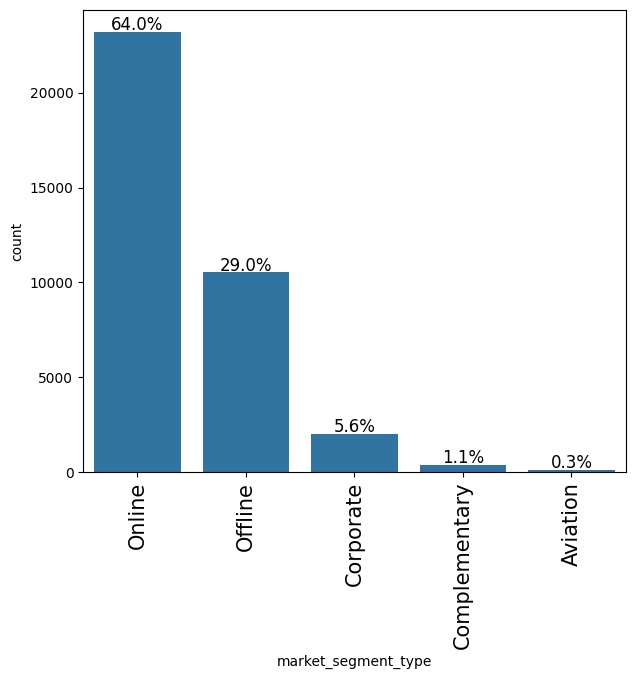

In [996]:
# market segment type
labeled_barplot(data, 'market_segment_type', perc=True)

Observations:
* Dominance of Online Bookings: The majority of customers prefer booking online, which is common in today’s digital landscape. This data suggests that maintaining and optimizing online booking systems should be a top priority.

* Significant Offline Presence: Although online dominates, offline channels still capture a large portion of bookings, indicating that not all customers are ready or willing to use online platforms. Therefore, offering robust offline support (such as phone reservations, in-person bookings, or agent services) could still be valuable.
* Corporate and Complementary: While corporate and complementary bookings are relatively small, they might still represent important customer segments (e.g., frequent business travelers or loyal customers using promotional offers).
* Complimentary and aviation represents small number, does not play major role.


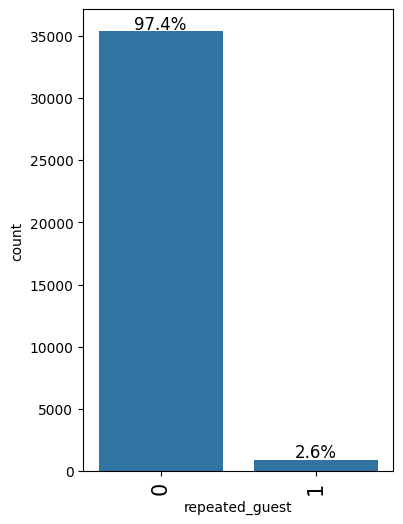

In [997]:
# repeated guests distribution
labeled_barplot(data, 'repeated_guest', perc=True)

Observation: 97.4% of guests are not repeated.

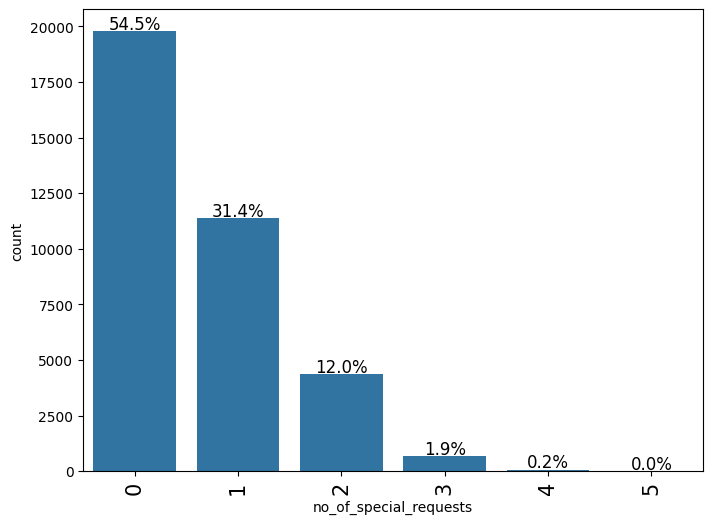

In [998]:
# Special requests
labeled_barplot(data, 'no_of_special_requests', perc=True)

Observation:
* 54.5% of customers doesn't have special requests, more special requests less represenation.

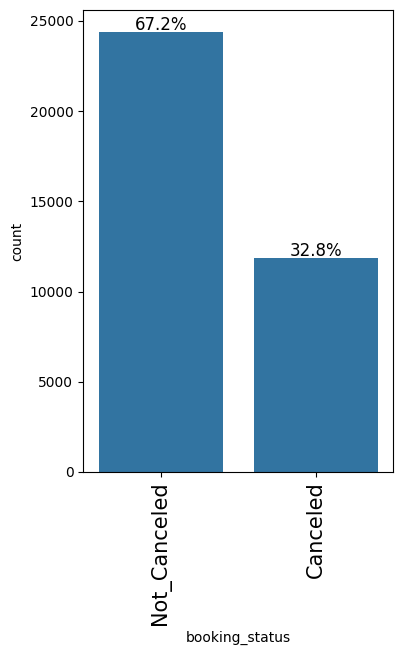

In [999]:
# booking status
labeled_barplot(data, 'booking_status', perc=True)

Observation:
* The relatively high cancellation rate (32.8%) could indicate several underlying issues. These could range from customer dissatisfaction, pricing or booking flexibility, external factors like travel restrictions, or overbooking strategies.

### Bivariate Analysis

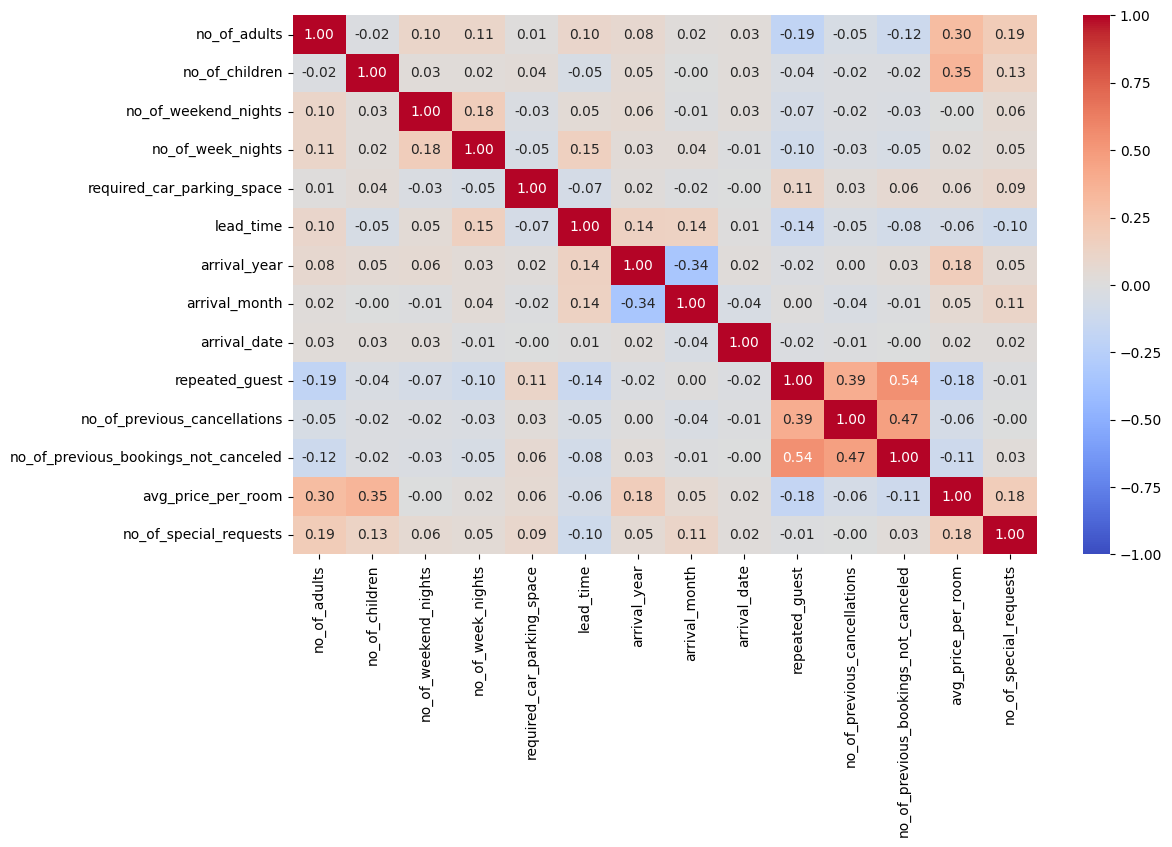

In [1000]:
# select numerical columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)
plt.show()

Observations:
* There is a positive correlation between number of adults and children with average price per room
* There is a positive correlation between number of previous bookings canceled and not canceled with repeated guests.
* There is a positive correlation between weeknights and lead time
* There is a postive correlation between repeated guest and number of previous bookings not canceled.
* There is a negative correlation between repeated guests and average room price

Insights:

* Business Insights: The correlation between number of previous cancellations and previous bookings not canceled suggests that customers who cancel frequently are still likely to have successful bookings as well. This may point to the need for better customer retention strategies.
* Repeated Guests: The negative correlation between repeated guests and number of adults could suggest that larger groups are less likely to return for future bookings. This might require targeted marketing to convert larger groups into repeat customers.

In [1001]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [1002]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


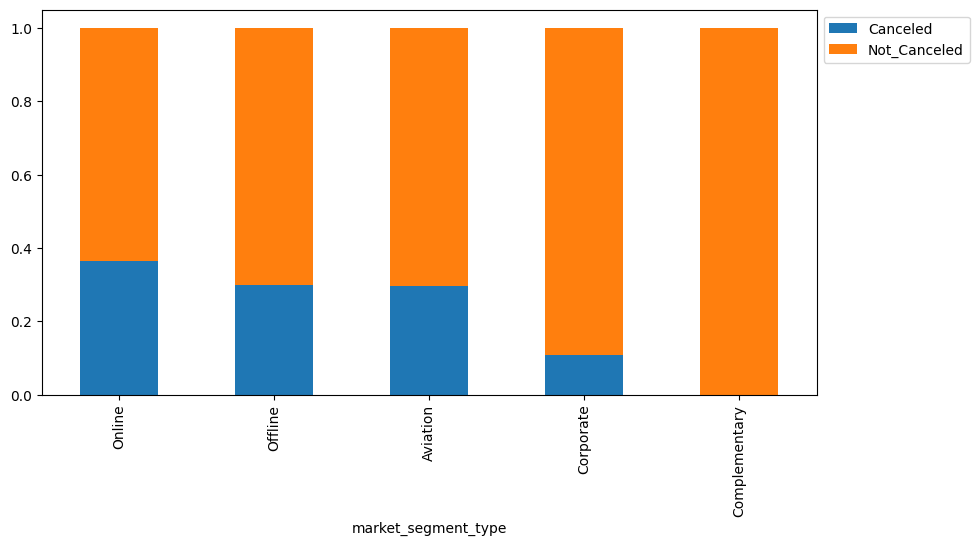

In [1003]:
stacked_barplot(dataset, "market_segment_type", "booking_status")

Observation: cancelled bookings are highest in online followed by offline, aviation and corporate. There is almost no cancelation in complimentry bookings.
Offline and aviation cancellations are similar

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


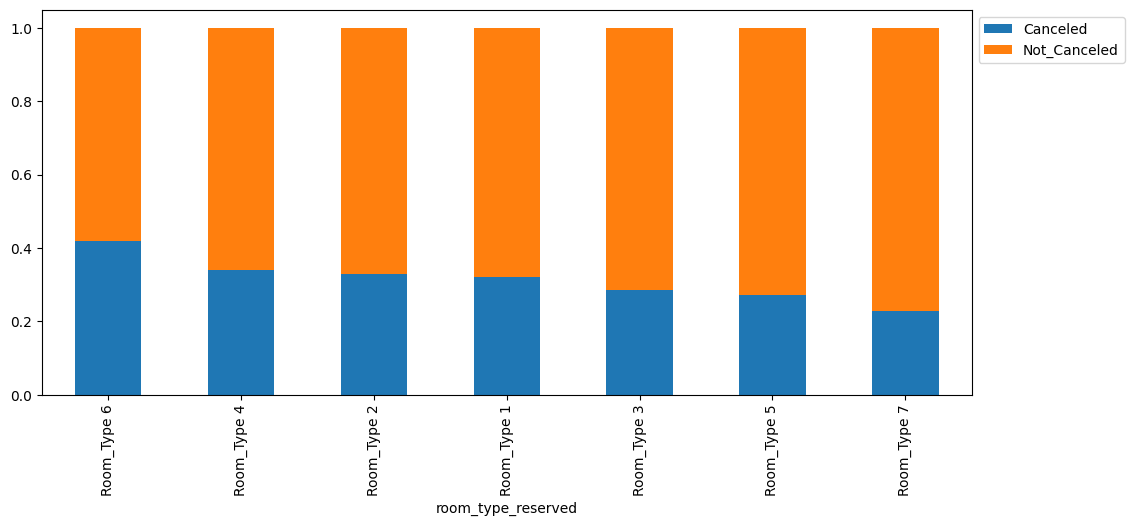

In [1004]:
stacked_barplot(dataset, "room_type_reserved", "booking_status")

Observation: Room type 6 has highest cancelations followed by room type 4 and 2

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


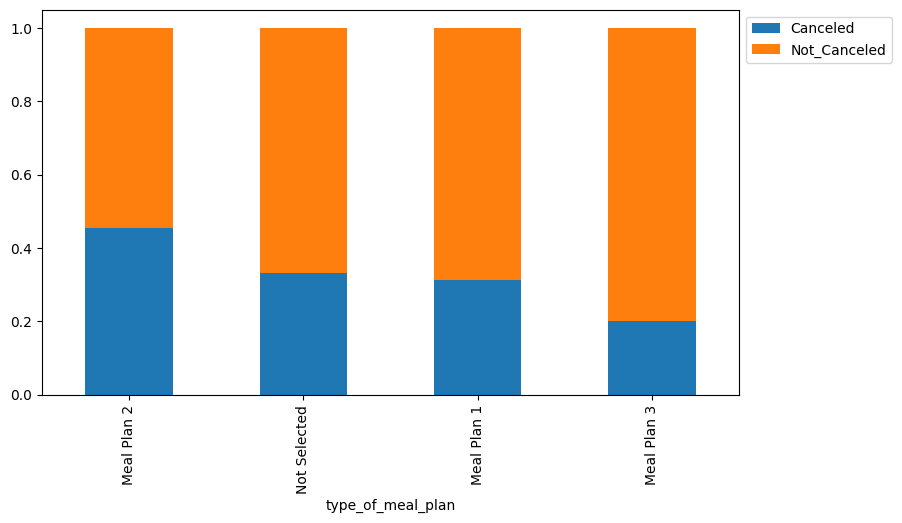

In [1005]:
stacked_barplot(dataset, "type_of_meal_plan", "booking_status")

Observation: Meal plan 2 has high number of cancelations, I think hotels may have to improve lunch quality or free lunchs

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


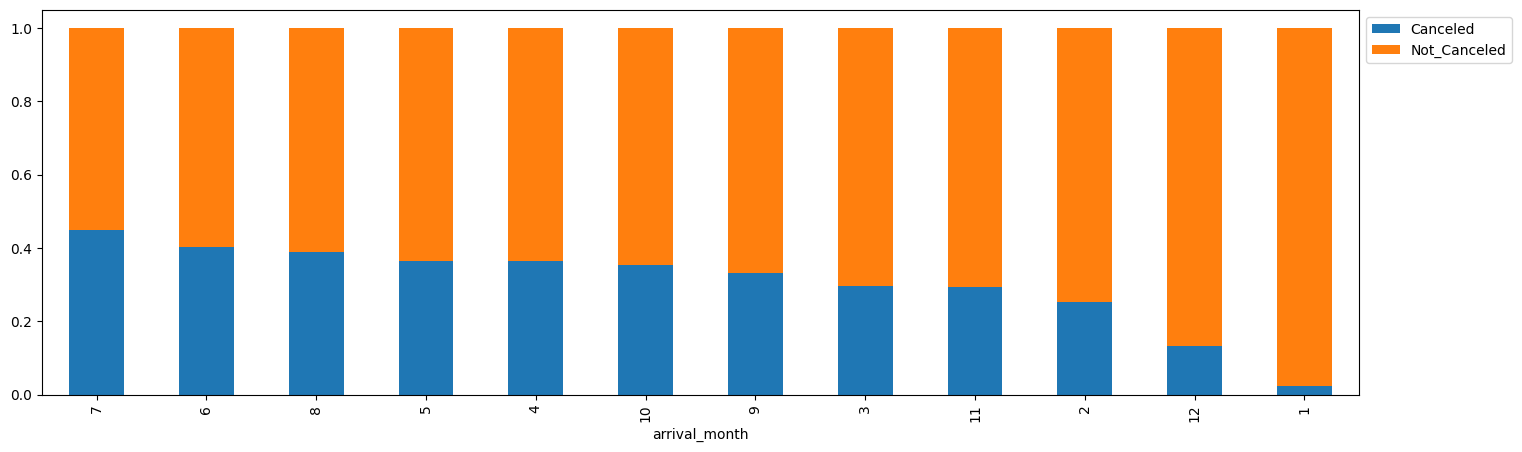

In [1006]:
stacked_barplot(dataset, "arrival_month", "booking_status")

Observation: July month has highest cancelations, followed by June and August

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


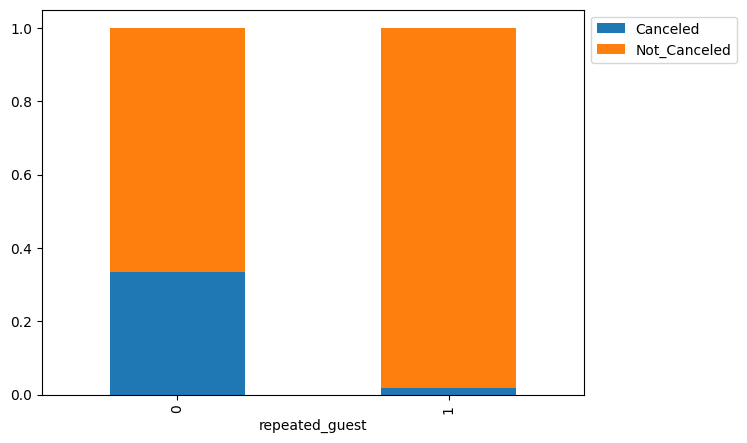

In [1007]:
stacked_barplot(dataset, "repeated_guest", "booking_status")

Observations: Repeated guest are less likely to cancel bookings, they may be routine visitors

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


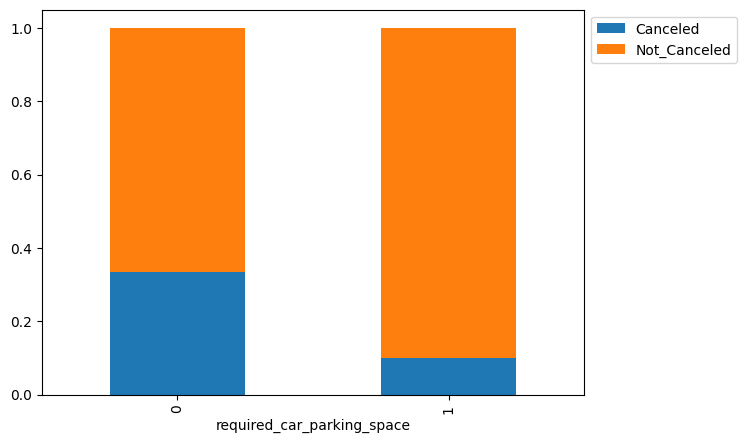

In [1008]:
stacked_barplot(dataset, "required_car_parking_space", "booking_status")

Observation:  People who require car parking are less likely to cancel booking.

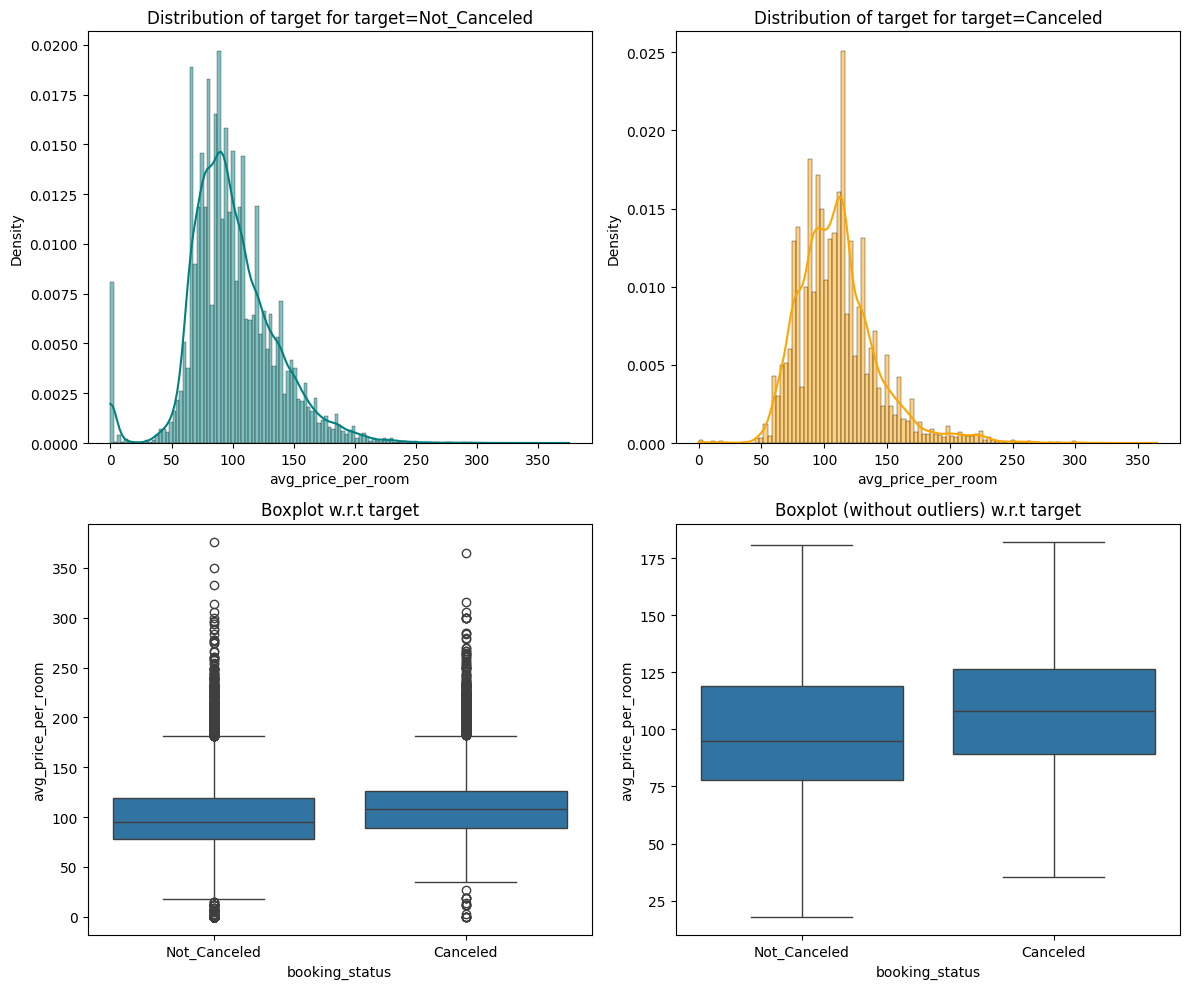

In [1009]:
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

Observation:
* Distribution seems normal for both canceled and not canceled booking status
* There is a subtle trend indicating that higher-priced rooms are more likely to be associated with cancellations. This could suggest a pricing strategy where higher prices might lead to more cancellation risk

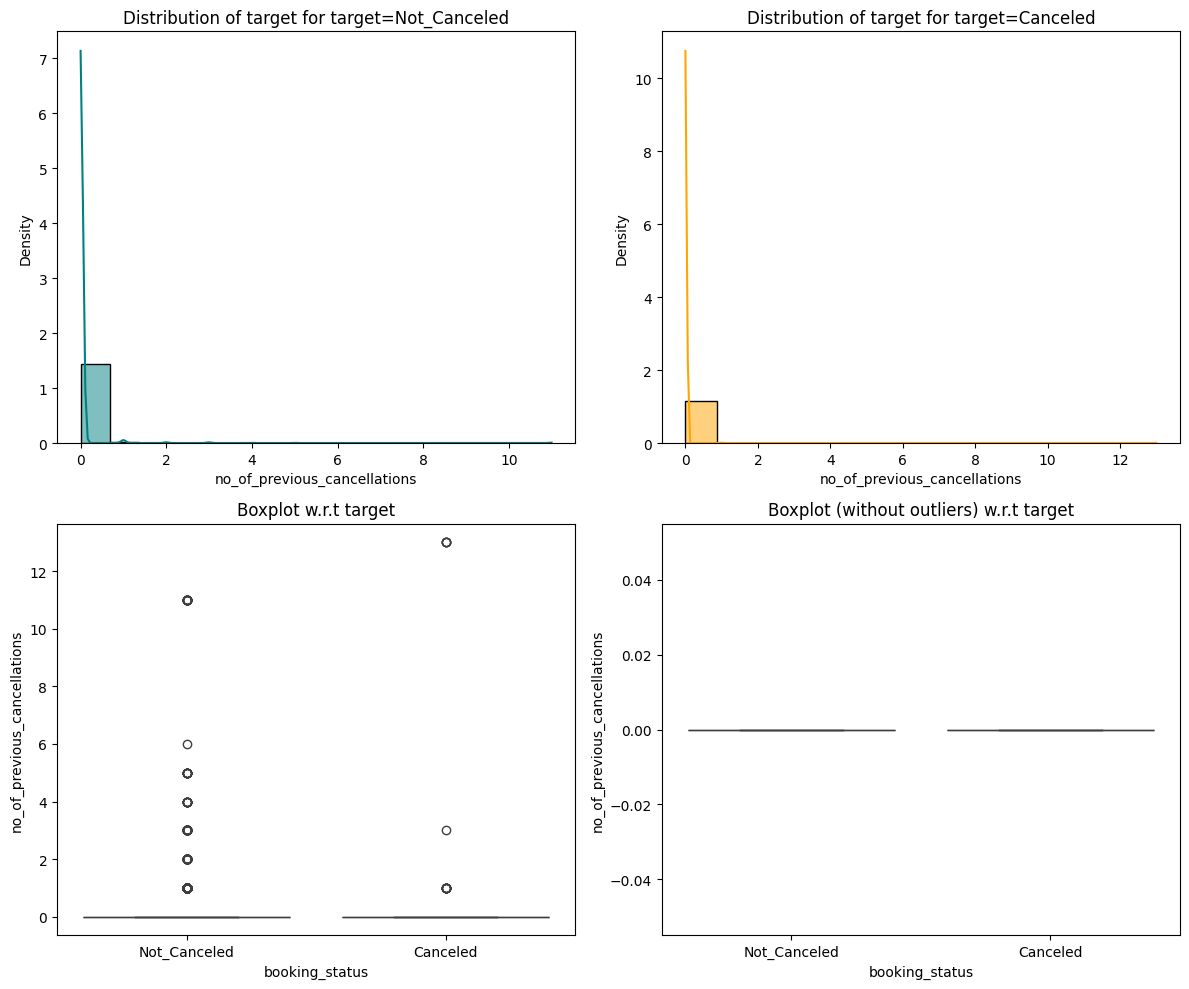

In [1010]:
distribution_plot_wrt_target(data, 'no_of_previous_cancellations', 'booking_status')

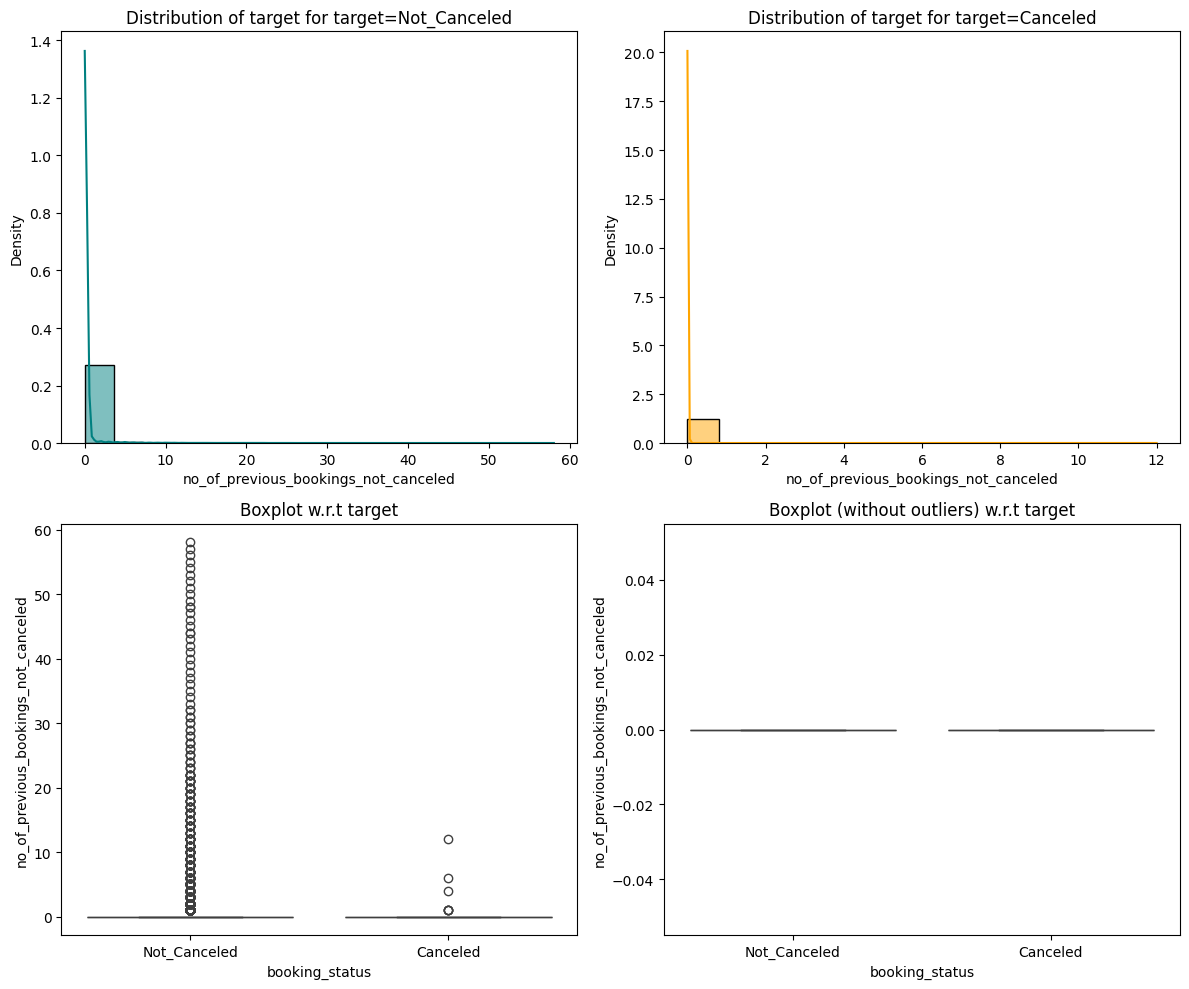

In [1011]:
distribution_plot_wrt_target(data, 'no_of_previous_bookings_not_canceled', 'booking_status')

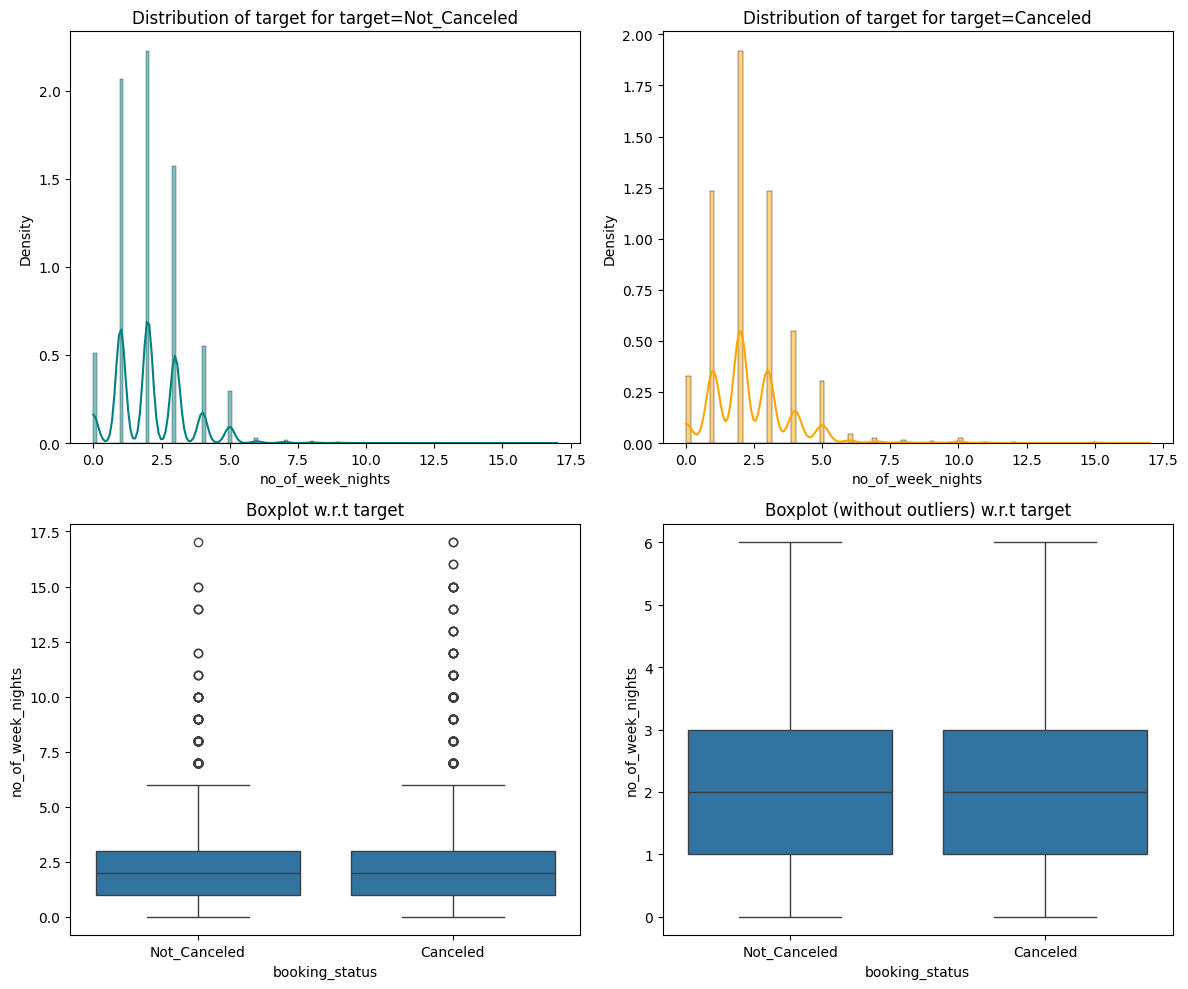

In [1012]:
distribution_plot_wrt_target(data, 'no_of_week_nights', 'booking_status')

Observation:  Number of weeknights is relatively similar for both canceled and not canceled bookings, with a slight tendency for longer stays to have a higher likelihood of cancellation (as seen in the outliers). If you're aiming to reduce cancellations, especially for longer stays, targeted strategies (e.g., stricter cancellation policies or incentives for longer bookings) could help.

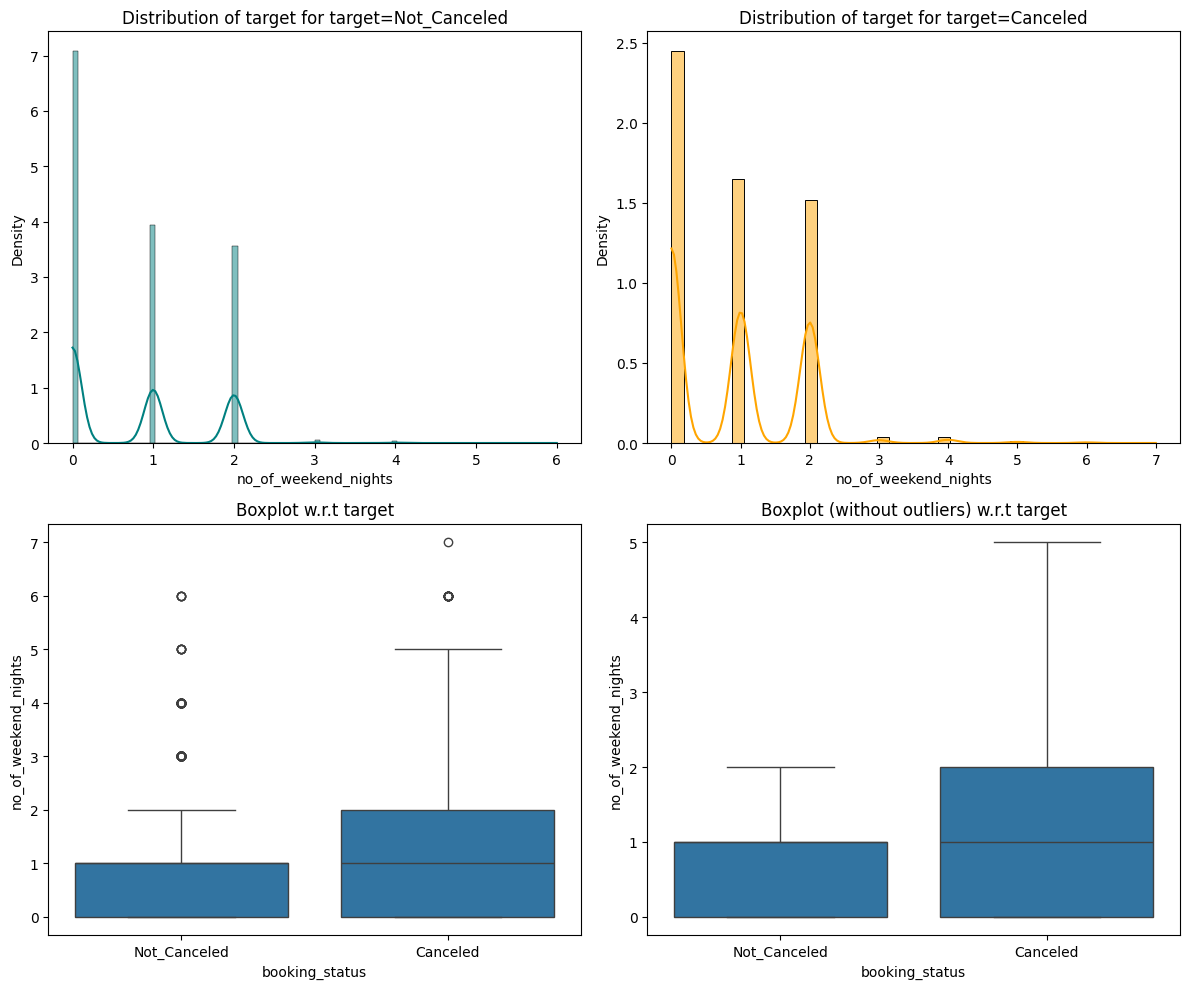

In [1013]:
distribution_plot_wrt_target(dataset, 'no_of_weekend_nights', 'booking_status')

Observation: bookings with more weekend nights are slightly more prone to being canceled, especially those with 3 or more weekend nights. If reducing cancellations for longer weekend stays is a priority, you might consider offering incentives or flexible cancellation policies to retain those bookings.

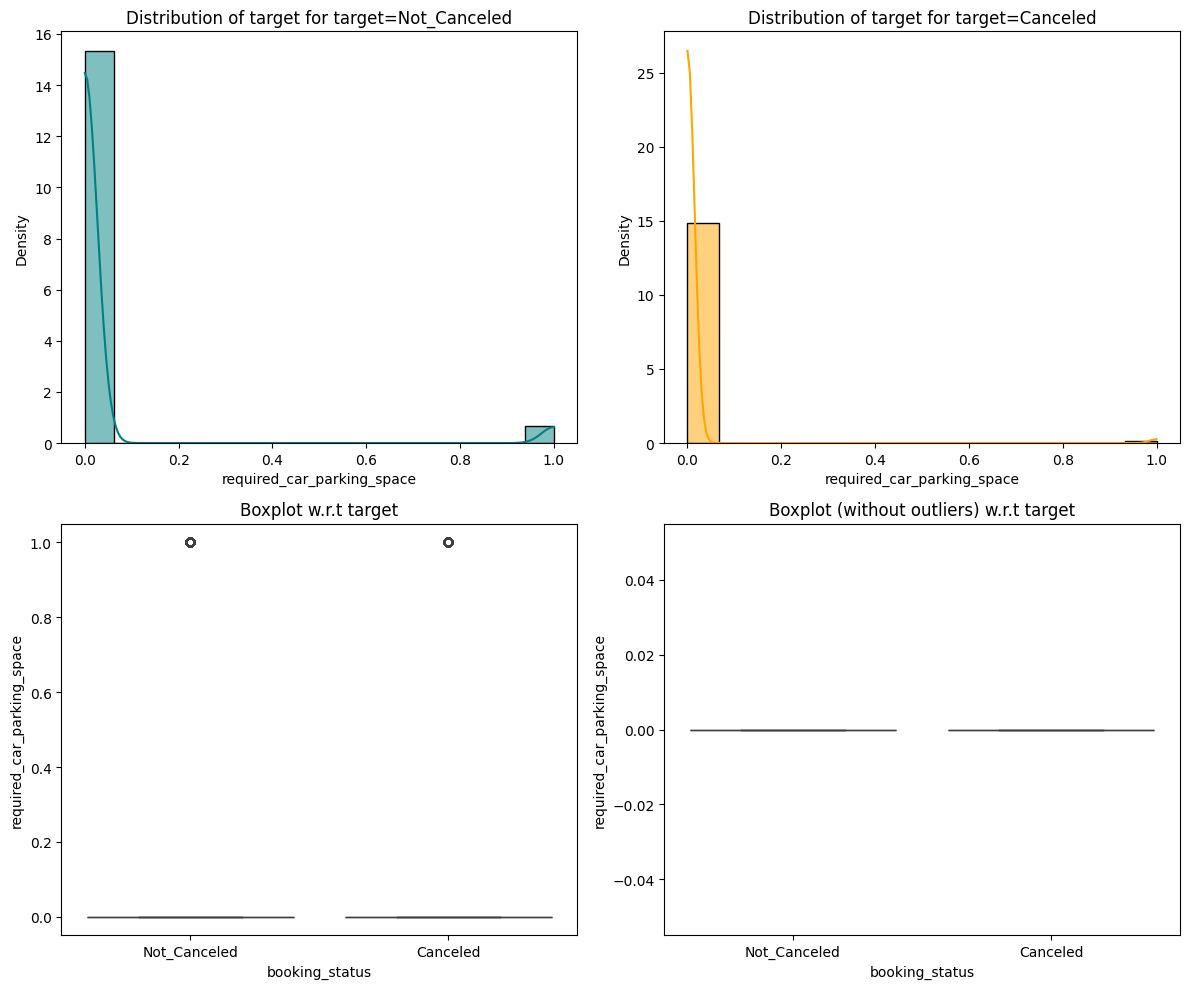

In [1014]:
distribution_plot_wrt_target(dataset, 'required_car_parking_space', 'booking_status')

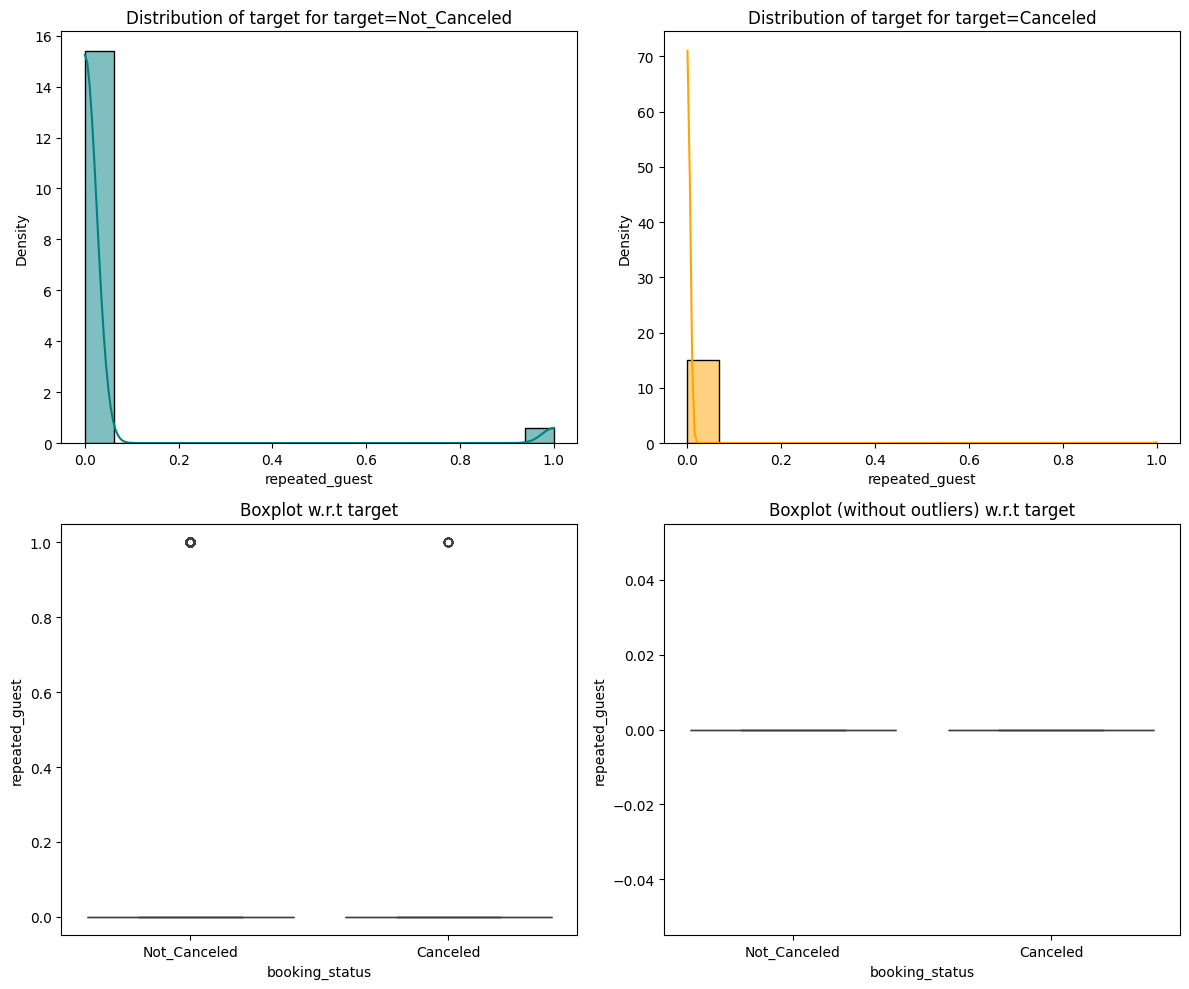

In [1015]:
distribution_plot_wrt_target(dataset, 'repeated_guest', 'booking_status')

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [1016]:
# What are the busiest months in the hotel?
dataset['arrival_month'].value_counts()

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64

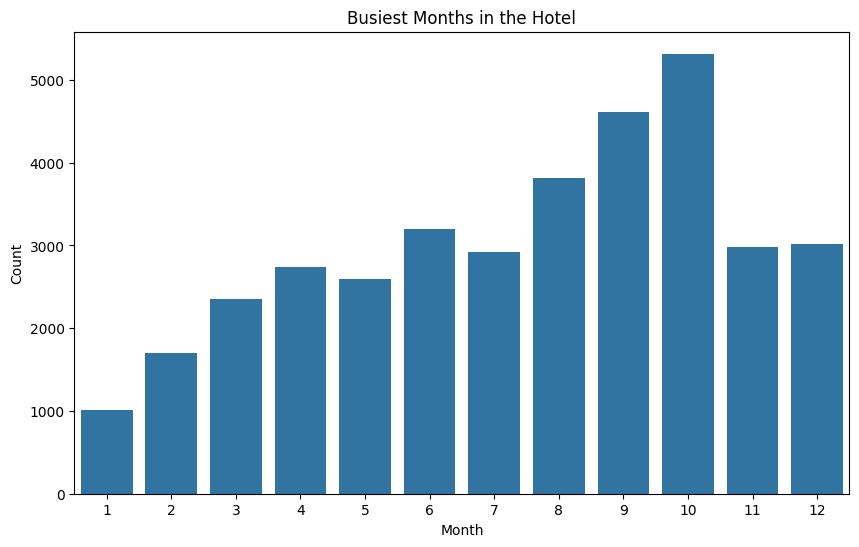

In [1017]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='arrival_month')
plt.title('Busiest Months in the Hotel')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Observation:
* Seasonality: The data shows clear seasonality in booking behavior, with a peak in the late summer to early fall (August to October) and a dip in the winter months (January and February). Understanding these trends could help in resource planning and marketing strategies, such as offering promotions during slower months.
* Holiday and Vacation Impact: The higher demand in October and the surrounding months could be driven by holiday periods, such as school holidays or specific events that attract travelers during these times.


In [1018]:
# Which market segment do most of the guests come from
dataset['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

Text(0, 0.5, 'Count')

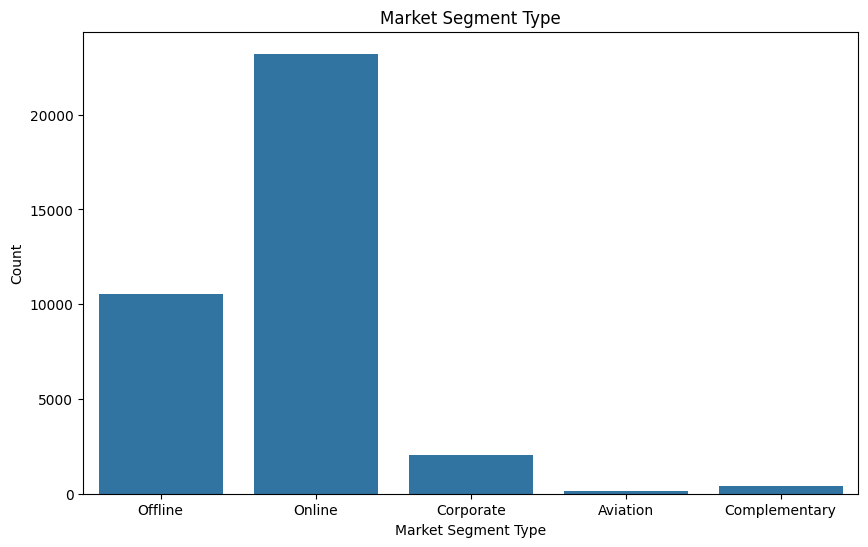

In [1019]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='market_segment_type')
plt.title('Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')

Observation: Most of the guests  come from online followed by offline, aviation guests are lowest as their staff numbers are not much it makes sense.

In [1020]:
# Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

difference_in_room_prices = dataset.groupby('market_segment_type')['avg_price_per_room'].mean()
print(difference_in_room_prices)

market_segment_type
Aviation        100.70400
Complementary     3.14176
Corporate        82.91174
Offline          91.63268
Online          112.25685
Name: avg_price_per_room, dtype: float64


Observations:
* Online rooms average prices are highest, followed by aviation. Complementry room prices are lowest
* The offline and corporate rooms prices are almost similar

In [1021]:
# What percentage of bookings are canceled?
percent_bookings_cancelled = dataset['booking_status'].value_counts(normalize=True) * 100
print(percent_bookings_cancelled)

booking_status
Not_Canceled   67.23639
Canceled       32.76361
Name: proportion, dtype: float64


Observation: 32.76% bookings are cancelled, which is quite high needs further investigation

In [1022]:
# Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
repeating_guests = dataset[dataset['repeated_guest'] == 1]
percent_repeating_guests_cancelled = repeating_guests['booking_status'].value_counts(normalize=True) * 100
print(percent_repeating_guests_cancelled)

booking_status
Not_Canceled   98.27957
Canceled        1.72043
Name: proportion, dtype: float64


Observation: Repeating guests cancellation is very low 1.72%, they are relaible customers.

In [1023]:
# Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
special_requirements = dataset[dataset['no_of_special_requests'] > 0]
percent_special_requirements_cancelled = special_requirements['booking_status'].value_counts(normalize=True) * 100
print(percent_special_requirements_cancelled)

booking_status
Not_Canceled   79.75512
Canceled       20.24488
Name: proportion, dtype: float64


Observation: Special requirement guests are less prone to cancellation (20.24%).

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

* Missing value treatment

In [1024]:
dataset.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Observation: There are no missing values

* Feature engineering

* Outlier detection and treatment

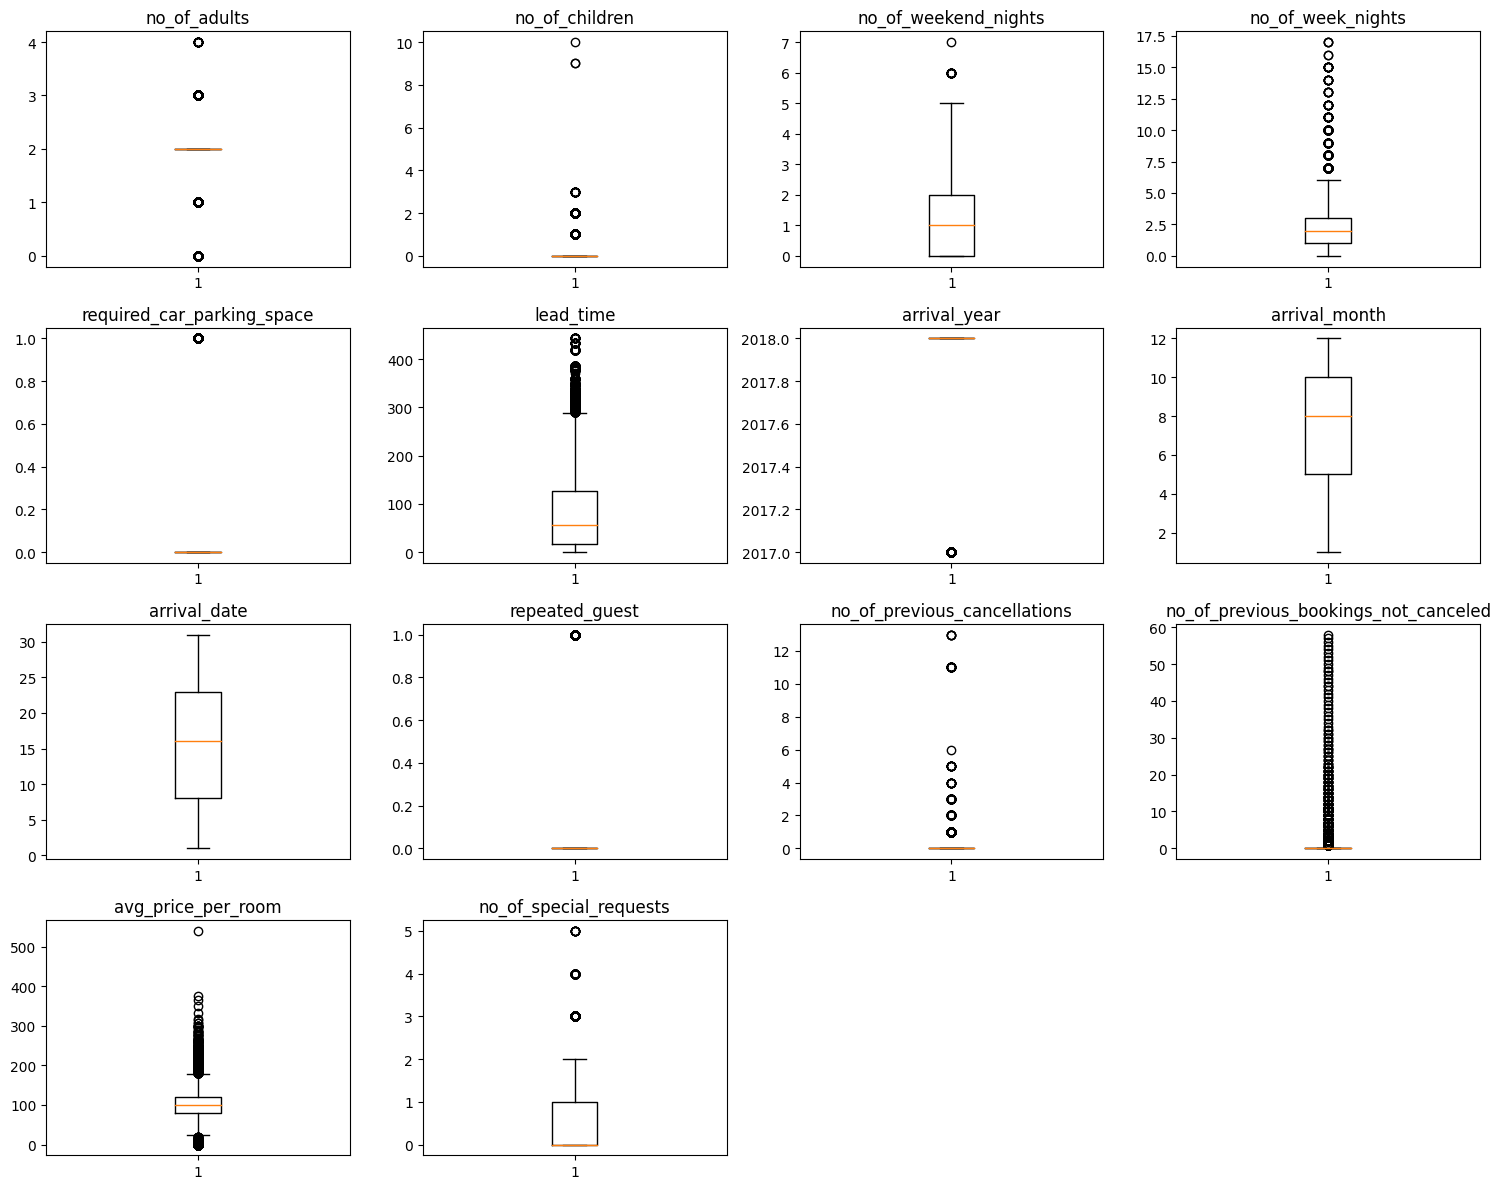

In [1025]:
numeric_columns = dataset.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(dataset[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:

There are quite a few outliers in the data.
However, we will not treat them as they are proper values

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [1026]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [1027]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [1028]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [1029]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

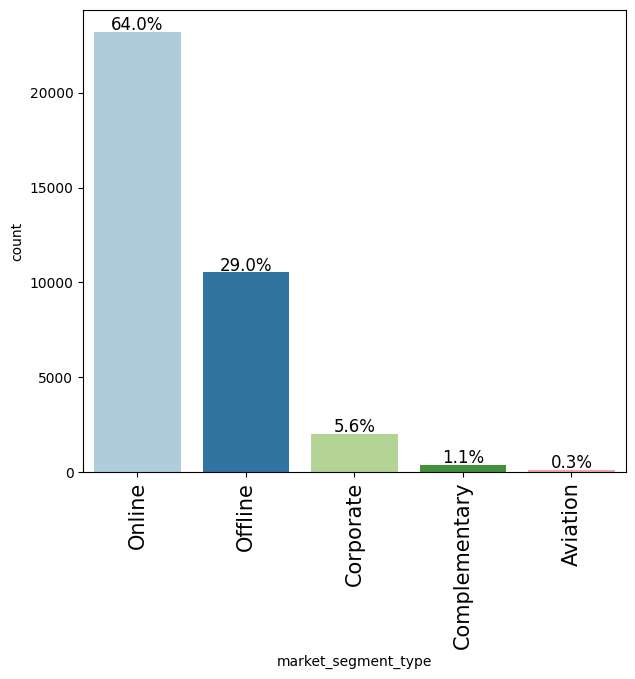

In [1030]:
labeled_barplot(data, 'market_segment_type', perc=True)

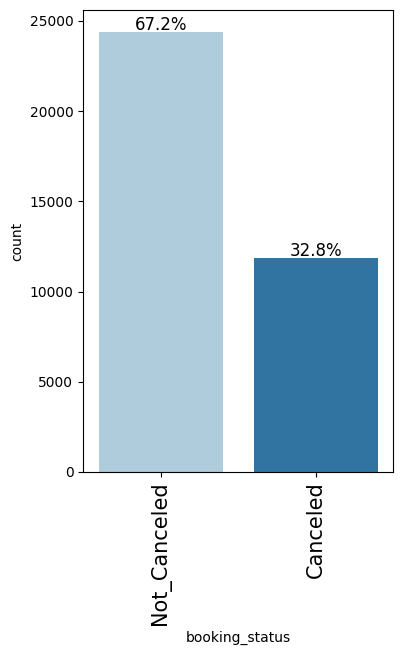

In [1031]:
labeled_barplot(data, 'booking_status', perc=True)

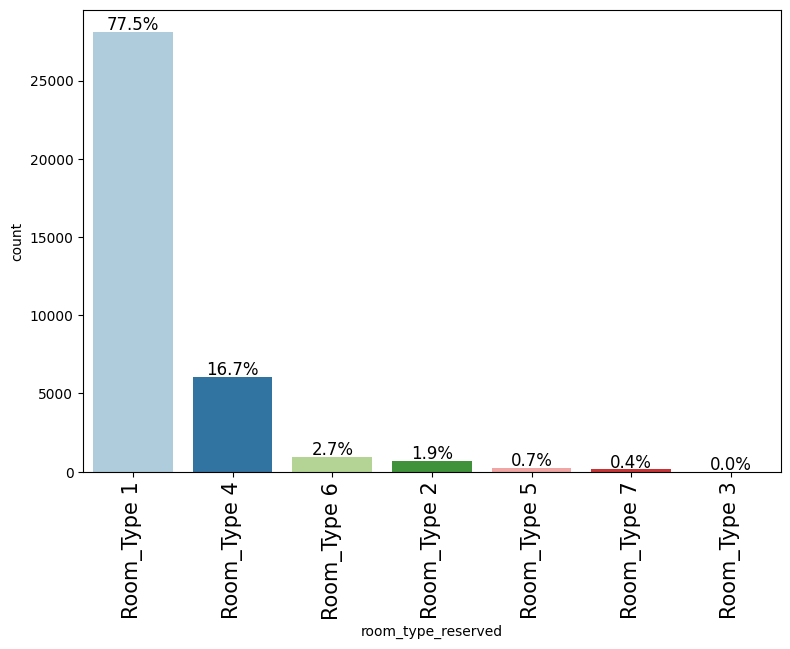

In [1032]:
labeled_barplot(data, 'room_type_reserved', perc=True)

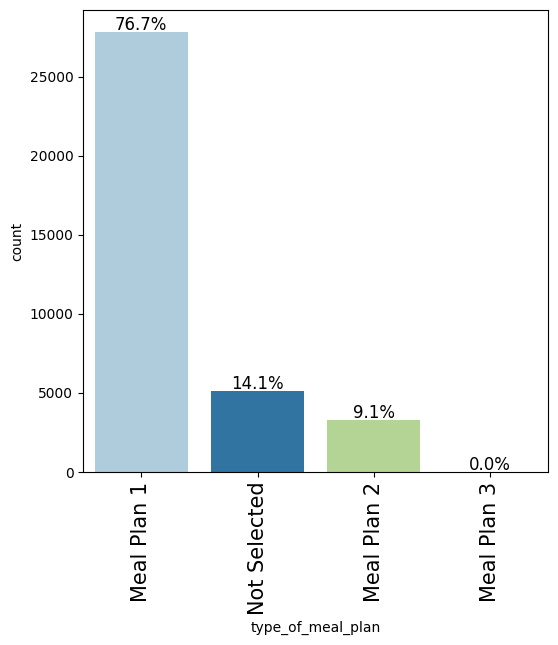

In [1033]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

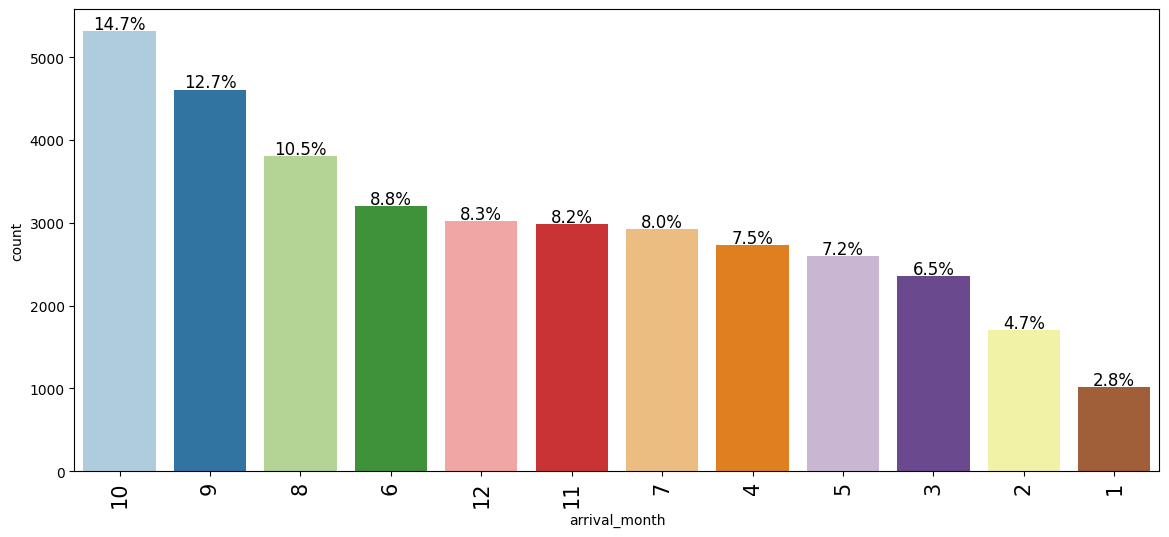

In [1034]:
labeled_barplot(data, 'arrival_month', perc=True)

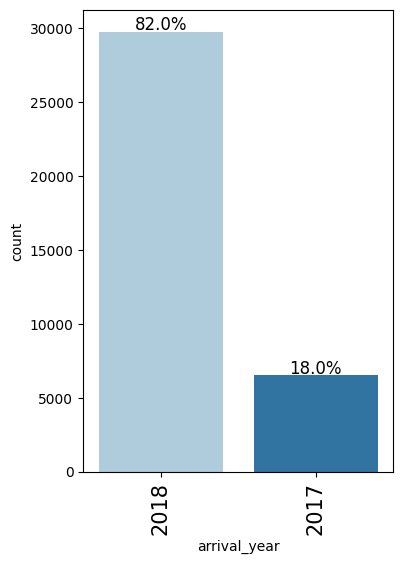

In [1035]:
labeled_barplot(data, 'arrival_year', perc=True)

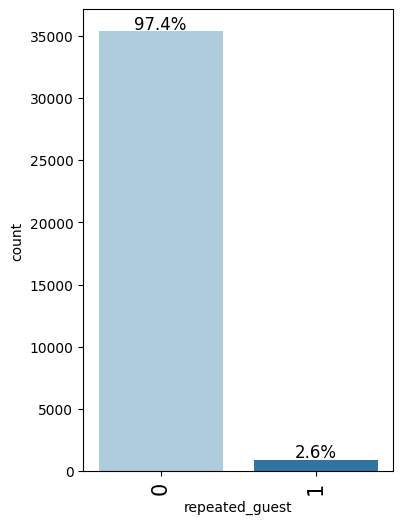

In [1036]:
labeled_barplot(data, 'repeated_guest', perc=True)

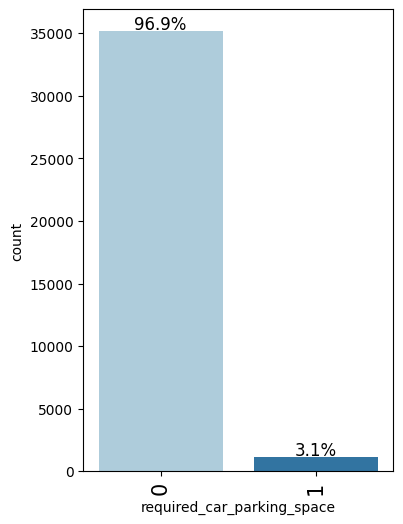

In [1037]:
labeled_barplot(data, 'required_car_parking_space', perc=True)

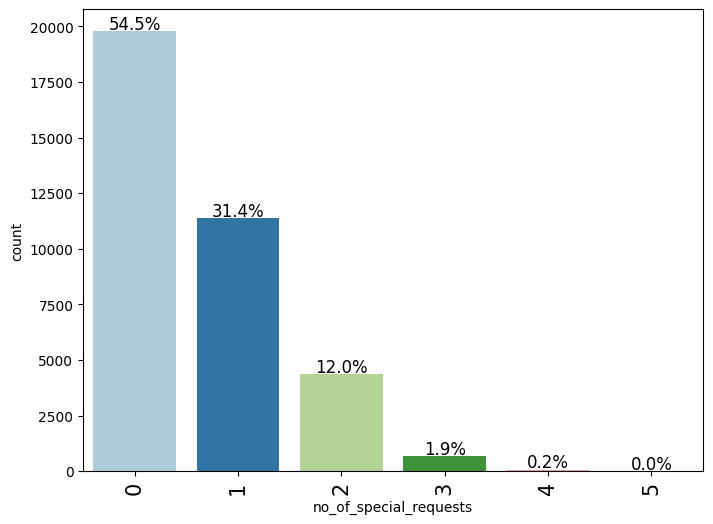

In [1038]:
labeled_barplot(data, 'no_of_special_requests', perc=True)

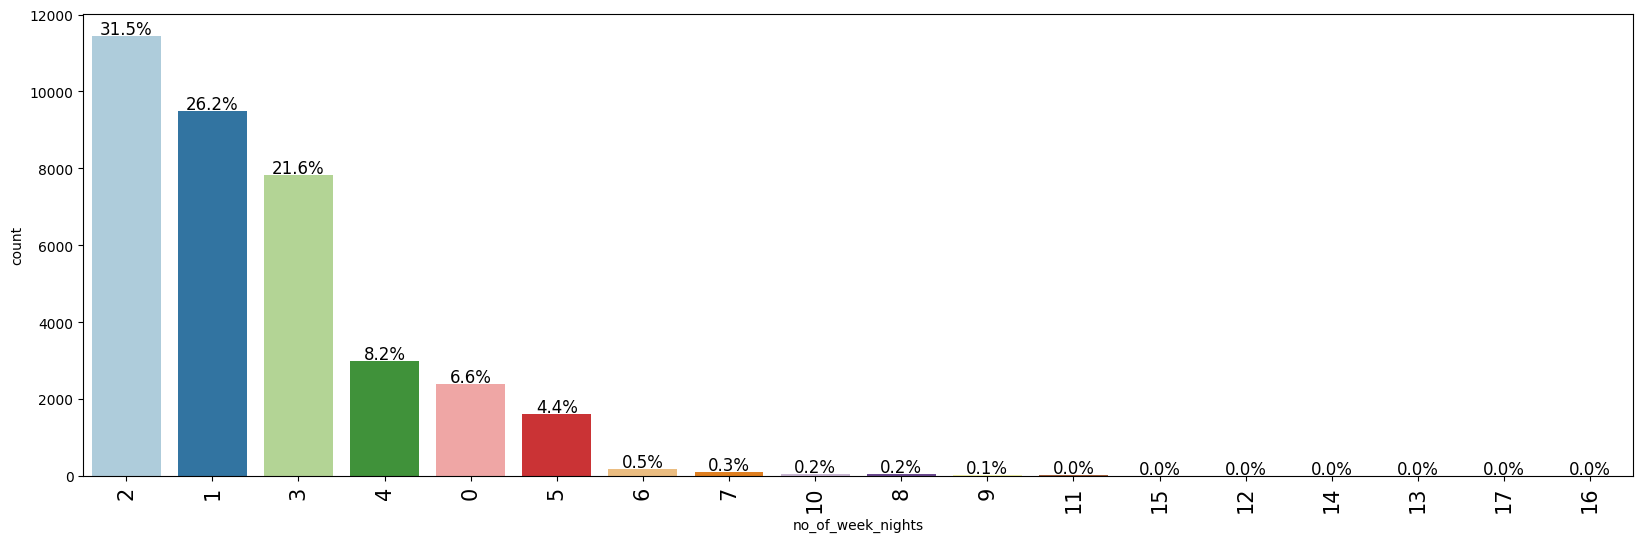

In [1039]:
labeled_barplot(data, 'no_of_week_nights', perc=True)

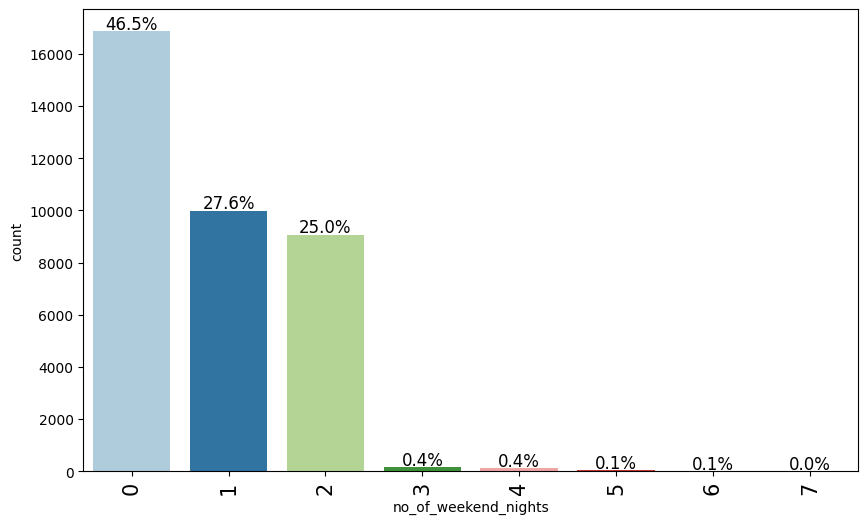

In [1040]:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

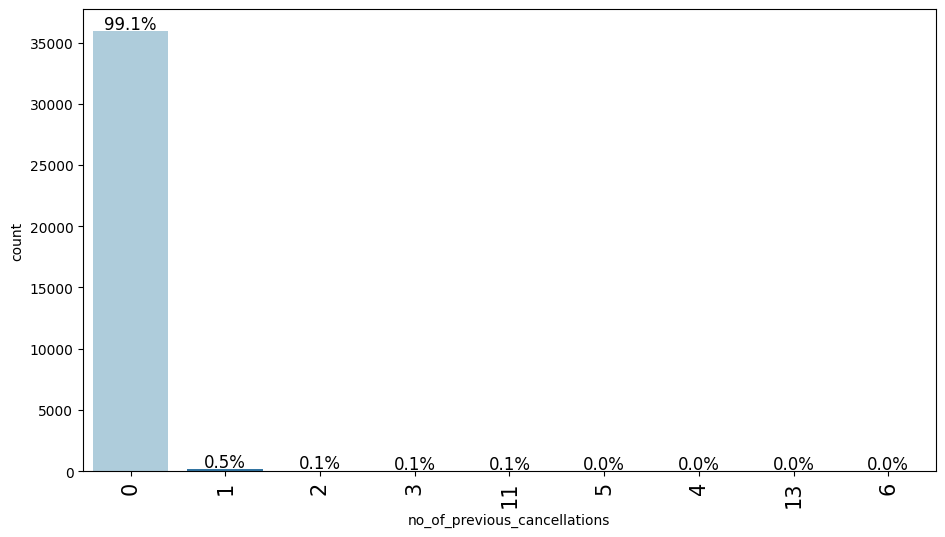

In [1041]:
labeled_barplot(data, 'no_of_previous_cancellations', perc=True)

### Bivariate Analysis

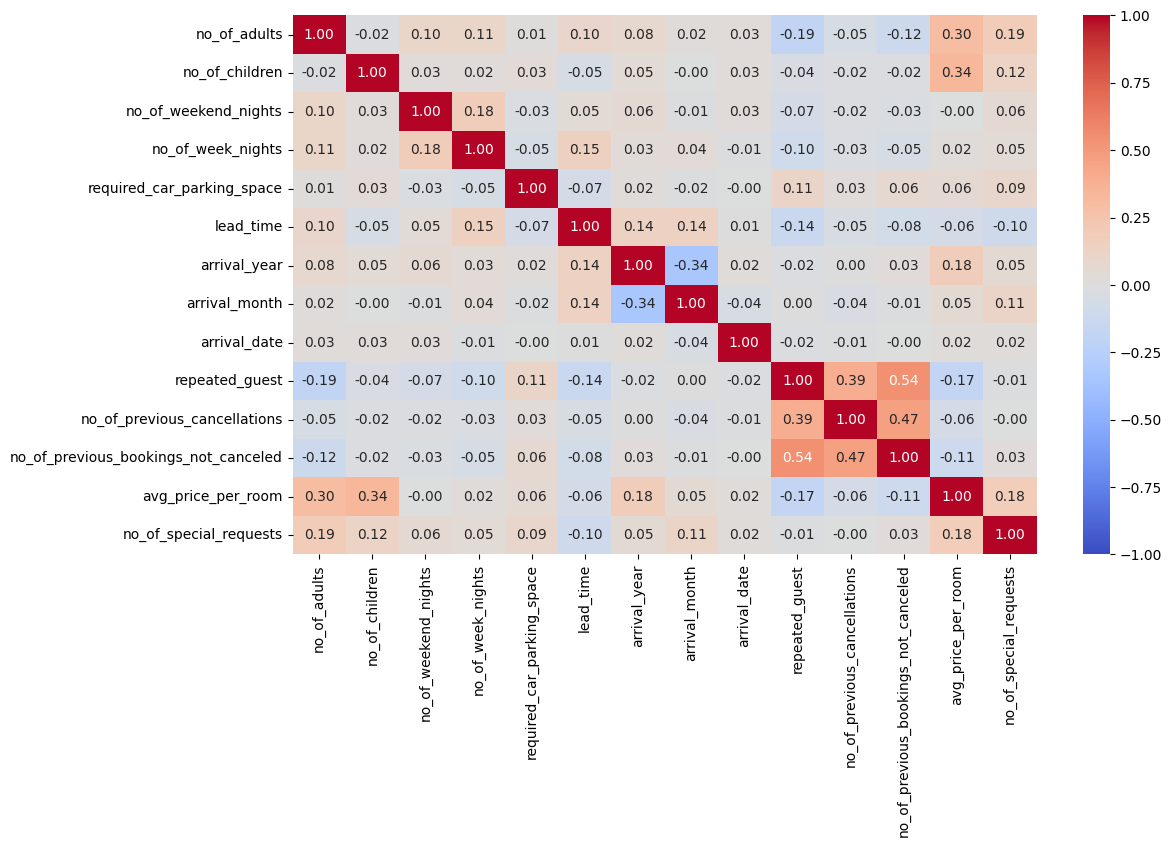

In [1042]:
num_cols = dataset.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,7))
sns.heatmap(dataset[num_cols].corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1, fmt='.2f')
plt.show()

Observation after treating outliers: there is almost no change in the correlation between features

# Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [1043]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [1044]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with statsmodels library)

#### Data Preparation for modeling (Logistic Regression)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [1045]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [1046]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [1047]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [1048]:
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [1049]:
X_train.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
13662      1             1               0                     0   
26641      1             2               0                     0   
17835      1             2               0                     2   
21485      1             2               0                     0   
5670       1             2               0                     1   

       no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
13662                  1                           0        163          2018   
26641                  3                           0        113          2018   
17835                  3                           0        359          2018   
21485                  3                           0        136          2018   
5670                   2                           0         21          2018   

       arrival_month  arrival_date  repeated_guest  \
13662             10            15               0   
26641              3            31               0   
17835             10            14               0   
21485              6            29               0   
5670               8            15               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662                 115                       0   
26641                  78                       1   
17835                  78                       1   
21485                  85                       0   
5670                  151                       0   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
13662                              0                              0   
26641                              0                              0   
17835                              0                              0   
21485                              0                              0   
5670                               0                              0   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
13662                               0                               0   
26641                               0                               1   
17835                               0                               0   
21485                               1                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
13662                               0                                  0   
26641                               0                                  0   
17835                           

In [1050]:
y_train.head()

13662    1
26641    0
17835    0
21485    1
5670     1
Name: booking_status, dtype: int64

#### Building Logistic Regression Model

In [1051]:
from sklearn.linear_model import LogisticRegression
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3293
Time:                        23:37:27   Log-Likelihood:                -10792.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -921.5462    120.827     -7.627      0.000   -1158.362    -684.730
no_of_adults                             0.1145      

In [1052]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80596 0.63422    0.73954 0.68285

#### Multicollinearity

In [1053]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [1054]:
checking_vif(X_train).sort_values(by="VIF", ascending=False)

feature            VIF
0                                  const 39490734.57350
27            market_segment_type_Online       71.17803
26           market_segment_type_Offline       64.11618
25         market_segment_type_Corporate       16.92839
24     market_segment_type_Complementary        4.50251
2                         no_of_children        2.09343
13                    avg_price_per_room        2.06016
22        room_type_reserved_Room_Type 6        2.05560
10                        repeated_guest        1.78355
12  no_of_previous_bookings_not_canceled        1.65200
7                           arrival_year        1.43165
11          no_of_previous_cancellations        1.39569
6                              lead_time        1.39537
20        room_type_reserved_Room_Type 4        1.36326
1                           no_of_adults        1.35066
8                          arrival_month        1.27625
15         type_of_meal_plan_Meal Plan 2        1.27330
17        type_of_meal_plan_Not Selected        1.27270
14                no_of_special_requests        1.24798
23        room_type_reserved_Room_Type 7        1.11801
18        room_type_reserved_Room_Type 2        1.10605
4                      no_of_week_nights        1.09595
3                   no_of_weekend_nights        1.06974
5             required_car_parking_space        1.03998
21        room_type_reserved_Room_Type 5        1.02791
16         type_of_meal_plan_Meal Plan 3        1.02526
9                           arrival_date        1.00679
19        room_type_reserved_Room_Type 3        1.00330

Observation:
* None of the numerical variables show moderate or high multicollinearity.
* We will ignore the VIF for the dummy variables.

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [1055]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train.astype(float)[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [1056]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [1057]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3283
Time:                        23:37:31   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -914.2561    120.467     -7.589      0.000   -1150.368    -678.145
no_of_adults                       0.1097      0.037      2.939      0.

In [1058]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))

Training performance:


Accuracy  Recall  Precision      F1
0   0.80557 0.63303    0.73918 0.68200

* All the variables left have p-value<0.05.
* So we can say that lg1 is the best model for making any inference.
* The performance on the training data is the same as before dropping the variables with the high p-value.

Coefficient interpretations:
* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

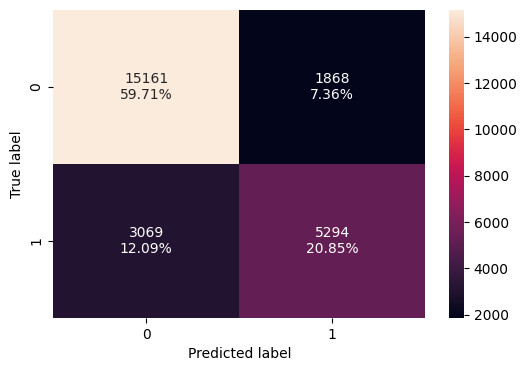

In [1059]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))

In [1060]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float)
)
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80557 0.63303    0.73918 0.68200

Let's check the performance on the test set

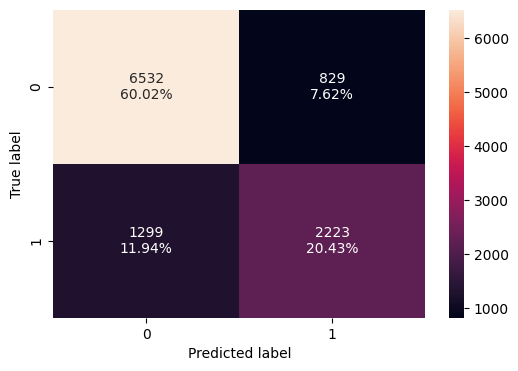

In [1061]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float))

In [1062]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float)
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80447 0.63118    0.72837 0.67630

#### Overall Comparison:
* Generalization: The metrics are very close between the training and test sets, which is a positive indicator of the model's generalization capability. It shows that the model is not overfitting to the training data, as there is no significant drop in performance on the test set.

* Precision and Recall Trade-off: While precision and recall are both slightly lower in the test set, they remain balanced. The model is likely performing well at identifying both true positives and minimizing false positives, with only a minor decrease in performance on unseen data.

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [1063]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11594         1.16534               1.11553   
Change_odd% -100.00000      11.59416        16.53413              11.55280   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04319                     0.20297    1.01584   
Change_odd%            4.31861                   -79.70273    1.58437   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57088        0.95834         0.06471   
Change_odd%      57.08751       -4.16607       -93.52885   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25716             1.01938   
Change_odd%                      25.71559             1.93804   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.23000                        1.17746   
Change_odd%               -77.00048                       17.74556   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.32950                         0.70275   
Change_odd%                        32.94984                       -29.72500   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75348                         0.47952   
Change_odd%                       -24.65213                       -52.04826   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37976                         0.23833   
Change_odd%                       -62.02421                       -76.16674   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45111                      0.16695  
Change_odd%                      -54.88875                    -83.30520

Coefficient interpretations:
* no_of_adults: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting cancelled by 1.11 times or a 11.49% increase in the odds of a booking getting cancelled.
* no_of_children: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting cancelled by 1.16 times or a 16.54% increase in the odds of a booking getting cancelled.
* no_of_weekend_nights: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.11 times or a 11.46% increase in the odds of a booking getting cancelled.
* no_of_week_nights: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.04 times or a 4.25% increase in the odds of a booking getting cancelled.
* required_car_parking_space: The odds of a customer who requires a car parking space are 0.2 times less than a customer who doesn't require a car parking space or a 79.70% fewer odds of a customer canceling their booking.
* lead_time: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.58% increase in the odds of a booking getting cancelled.
* no_of_special_requests: Holding all other features constant a 1 unit change in the number of special requests made by the customer will decrease the odds of a booking getting cancelled by 0.22 times or a 77% decrease in the odds of a booking getting cancelled.
* avg_price_per_room: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.93% increase in the odds of a booking getting cancelled.
* type_of_meal_plan_Not Selected: The odds of a customer who has not selected any meal plan cancelling the booking are 1.33 times more than a customer who has selected a meal plan or a 33.10% higher odds of a booking getting cancelled if a meal plan is not selected. [keeping all the other meal plan types as reference]

Interpretation for other attributes can be done similarly.

#### ROC-AUC
* ROC-AUC on training set

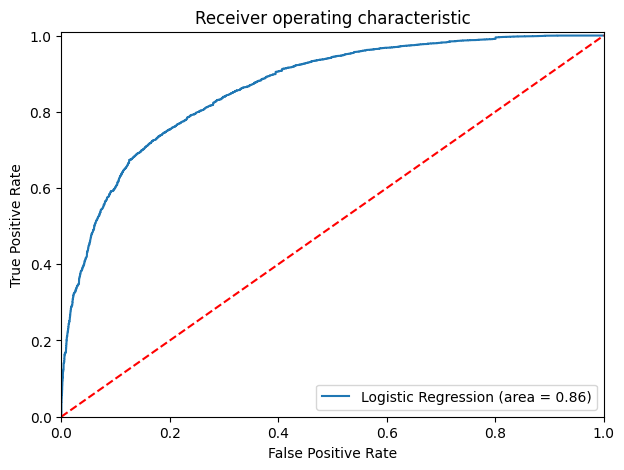

In [1064]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.86 on training is quite good.

#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [1065]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.372598551491902


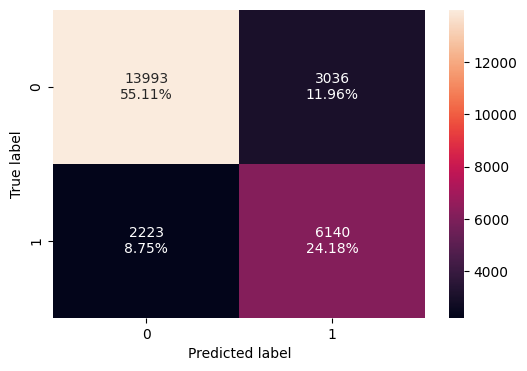

In [1066]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [1067]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79289 0.73419    0.66914 0.70015

* Recall has increased significantly as compared to the previous model.
* As we will decrease the threshold value, Recall will keep on increasing and the Precision will decrease, but this is not right, we need to choose an optimal balance between recall and precision.

Let's check the performance on the test set

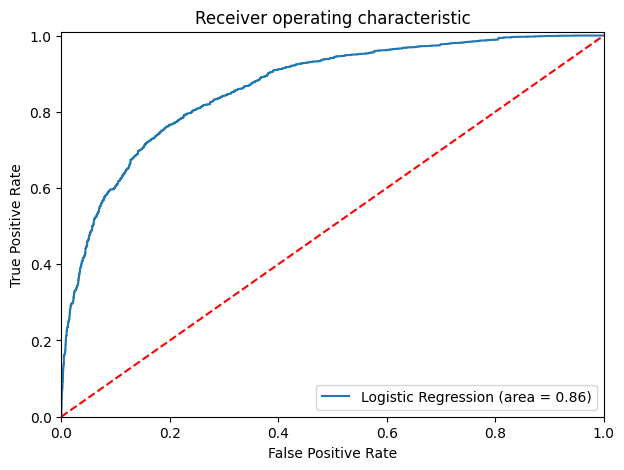

In [1068]:
logit_roc_auc_train = roc_auc_score(y_test.astype(float), lg1.predict(X_test1.astype(float)))
fpr, tpr, thresholds = roc_curve(y_test.astype(float), lg1.predict(X_test1.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

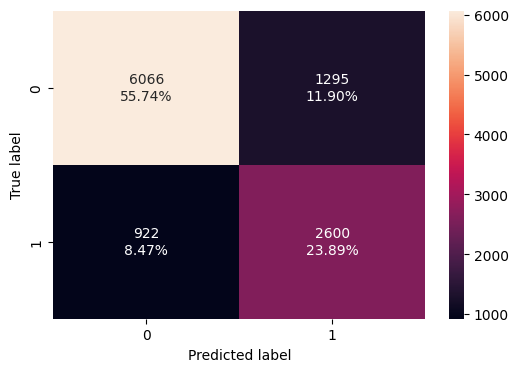

In [1069]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_auc_roc)

In [1070]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79629 0.73822    0.66752 0.70109

#### Let's use Precision-Recall curve and see if we can find a better threshold

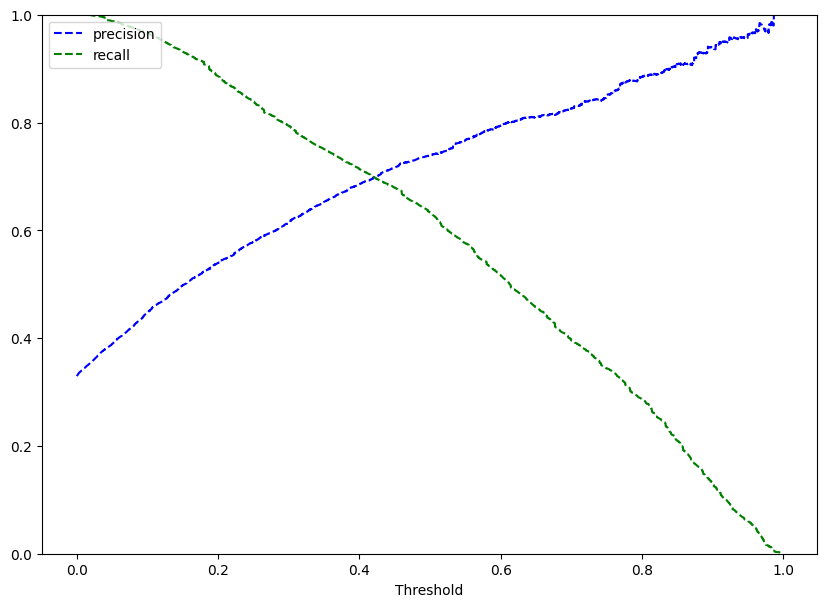

In [1071]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.42 threshold we get a balanced precision and recall.

In [1072]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

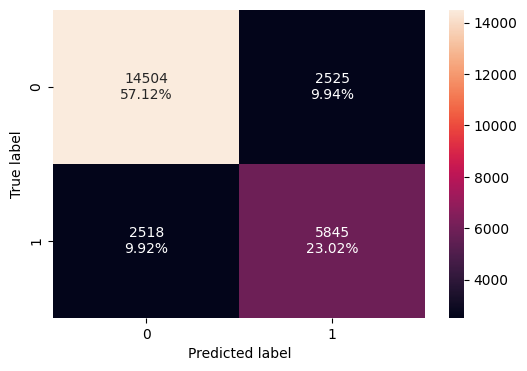

In [1073]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)

In [1074]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80139 0.69891    0.69833 0.69862

* Model performance has improved as compared to our initial model.
* Model has given a balanced performance in terms of precision and recall.

Let's check the performance on the test set

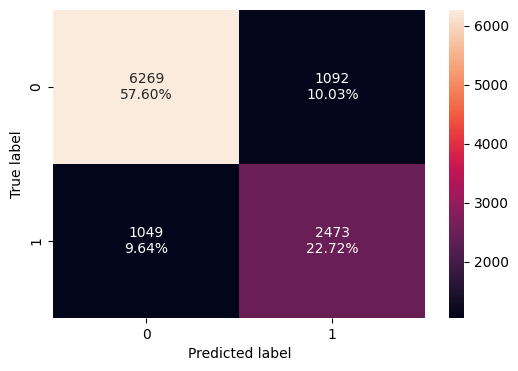

In [1075]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve)

In [1076]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80327 0.70216    0.69369 0.69790

Model performance summary

In [1077]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80557   
Recall                                   0.63303   
Precision                                0.73918   
F1                                       0.68200   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79289   
Recall                                0.73419   
Precision                             0.66914   
F1                                    0.70015   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80139  
Recall                                0.69891  
Precision                             0.69833  
F1                                    0.69862

In [1078]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80447   
Recall                                   0.63118   
Precision                                0.72837   
F1                                       0.67630   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79629   
Recall                                0.73822   
Precision                             0.66752   
F1                                    0.70109   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80327  
Recall                                0.70216  
Precision                             0.69369  
F1                                    0.69790

### Observations from Logistic Regression model:
* We have been able to build a predictive model that can be used by the hotel to predict which bookings are likely to be cancelled with an F1 score of 0.69 on the training set and formulate marketing policies accordingly.

* The logistic regression models are giving a generalized performance on training and test set.

* Using the model with default threshold the model will give a low recall but good precision score - The hotel will be able to predict which bookings will not be cancelled and will be able to provide satisfactory services to those customers which help in maintaining the brand equity but will lose on resources.

* Using the model with a 0.37 threshold the model will give a high recall but low precision score - The hotel will be able to save resources by correctly predicting the bookings which are likely to be cancelled but might damage the brand equity.
Using the model with a 0.42 threshold the model will give a balance recall and precision score - The hotel will be able to maintain a balance between resources and brand equity.

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.

* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

**Using model with default threshold**

In [1079]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80327 0.70216    0.69369 0.69790

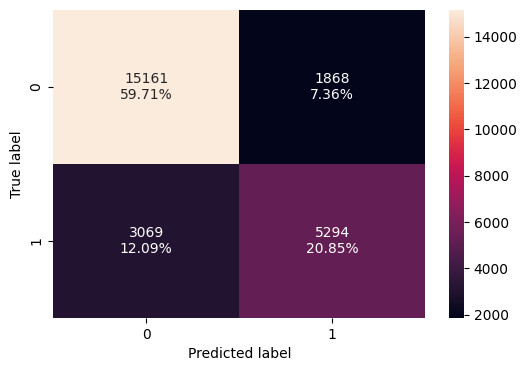

In [1080]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [1081]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80447 0.63118    0.72837 0.67630

**Using model with threshold = 0.37**

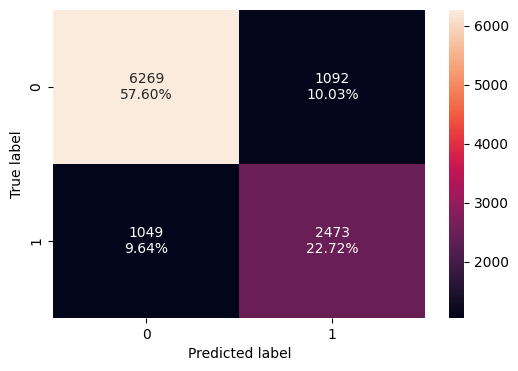

In [1082]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [1083]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79629 0.73822    0.66752 0.70109

**Using model with threshold = 0.42**

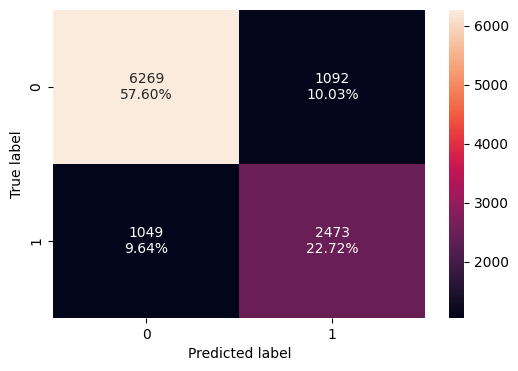

In [1084]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [1085]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80327 0.70216    0.69369 0.69790

In [1086]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80557   
Recall                                   0.63303   
Precision                                0.73918   
F1                                       0.68200   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79289   
Recall                                0.73419   
Precision                             0.66914   
F1                                    0.70015   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80139  
Recall                                0.69891  
Precision                             0.69833  
F1                                    0.69862

In [1087]:
# test performance comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.37 Threshold  \
Accuracy                       0.80447                             0.79629   
Recall                         0.63118                             0.73822   
Precision                      0.72837                             0.66752   
F1                             0.67630                             0.70109   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80327  
Recall                                0.70216  
Precision                             0.69369  
F1                                    0.69790

### Decision Tree

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [1088]:
X = data.drop('booking_status', axis=1)
y = data['booking_status']

X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [1089]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67238
1   0.32762
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67233
1   0.32767
Name: proportion, dtype: float64


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [1090]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [1091]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [1092]:
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

In [1093]:
print('Training data Accuracy:', dTree.score(X_train, y_train))
print('Test data Accuracy:', dTree.score(X_test, y_test))

Training data Accuracy: 0.9943683049779458
Test data Accuracy: 0.8635486538638243


In [1094]:
## Function to create confusion matrix
from sklearn import metrics
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1095]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

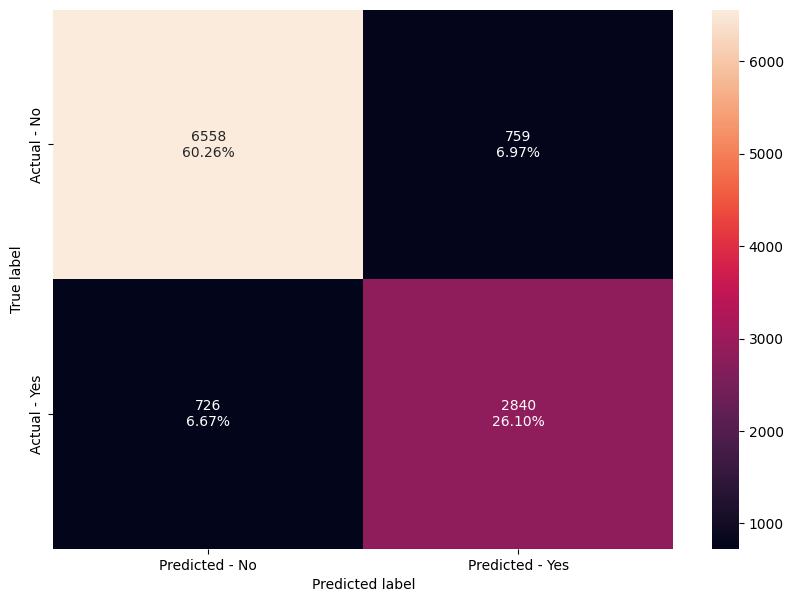

In [1096]:
make_confusion_matrix(dTree,y_test)

In [1097]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99437 0.98570    0.99708 0.99136

* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

#### Checking model performance on test set

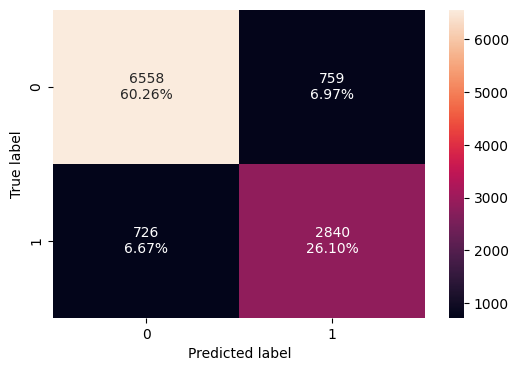

In [1098]:
confusion_matrix_sklearn(dTree, X_test, y_test)

In [1099]:
decision_tree_perf_test = model_performance_classification_sklearn(dTree, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86355 0.79641    0.78911 0.79274

* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree.

**Before pruning the tree let's check the important features.**

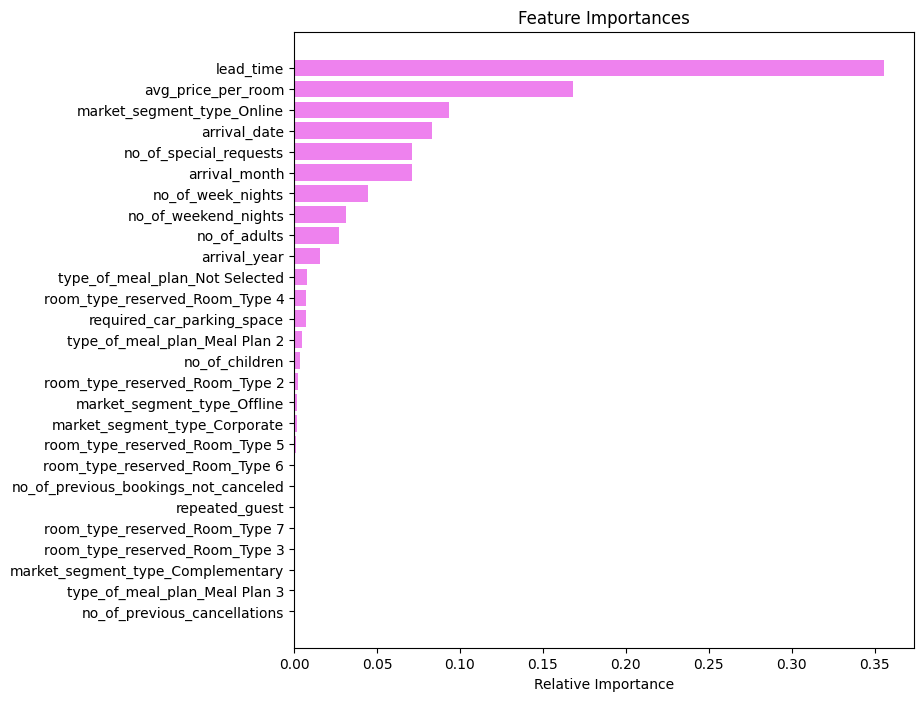

In [1100]:
feature_names = list(X_train.columns)
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time is the most important feature followed by average price per room.
* Now let's prune the tree to see if we can reduce the complexity.

#### Pruning the tree

*Pre-Pruning*

In [1101]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
   "max_depth": np.arange(2,8,2),  # Testing deeper trees in addition to current
    "max_leaf_nodes": [50, 100, 150, 250, 500],  # Adding more choices, including larger values
    "min_samples_split": [10, 30, 50, 100],  # Adjusting the range of splits
    "min_samples_leaf": [1, 5, 10, 20],  # Controlling leaf size, smaller values give finer trees
    "criterion": ["gini", "entropy"],  # Testing both Gini and Entropy for better splits
    # "max_features": [None, "sqrt", "log2"],  # Testing the number of features to consider at each split
    "min_impurity_decrease": [0.0, 0.01, 0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

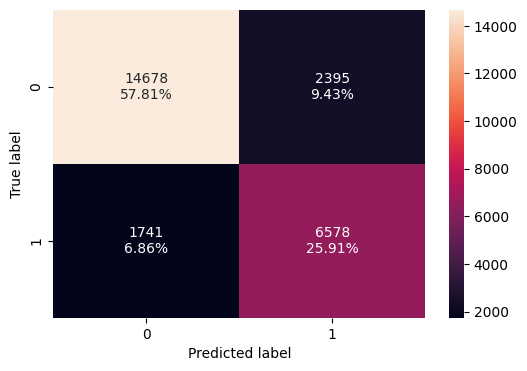

In [1102]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [1103]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(dTree, X_train, y_train)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.99437 0.98570    0.99708 0.99136

#### Checking performance on test set

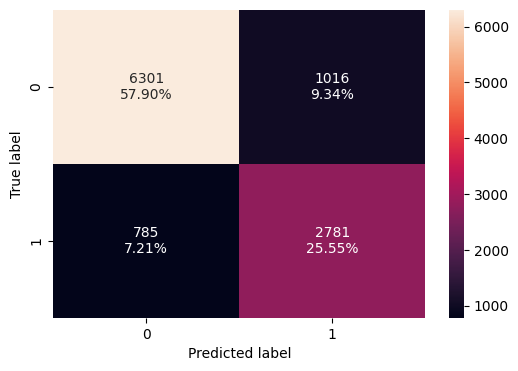

In [1104]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [1105]:

decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83451 0.77987    0.73242 0.75540

#### Visualizing the Decision Tree

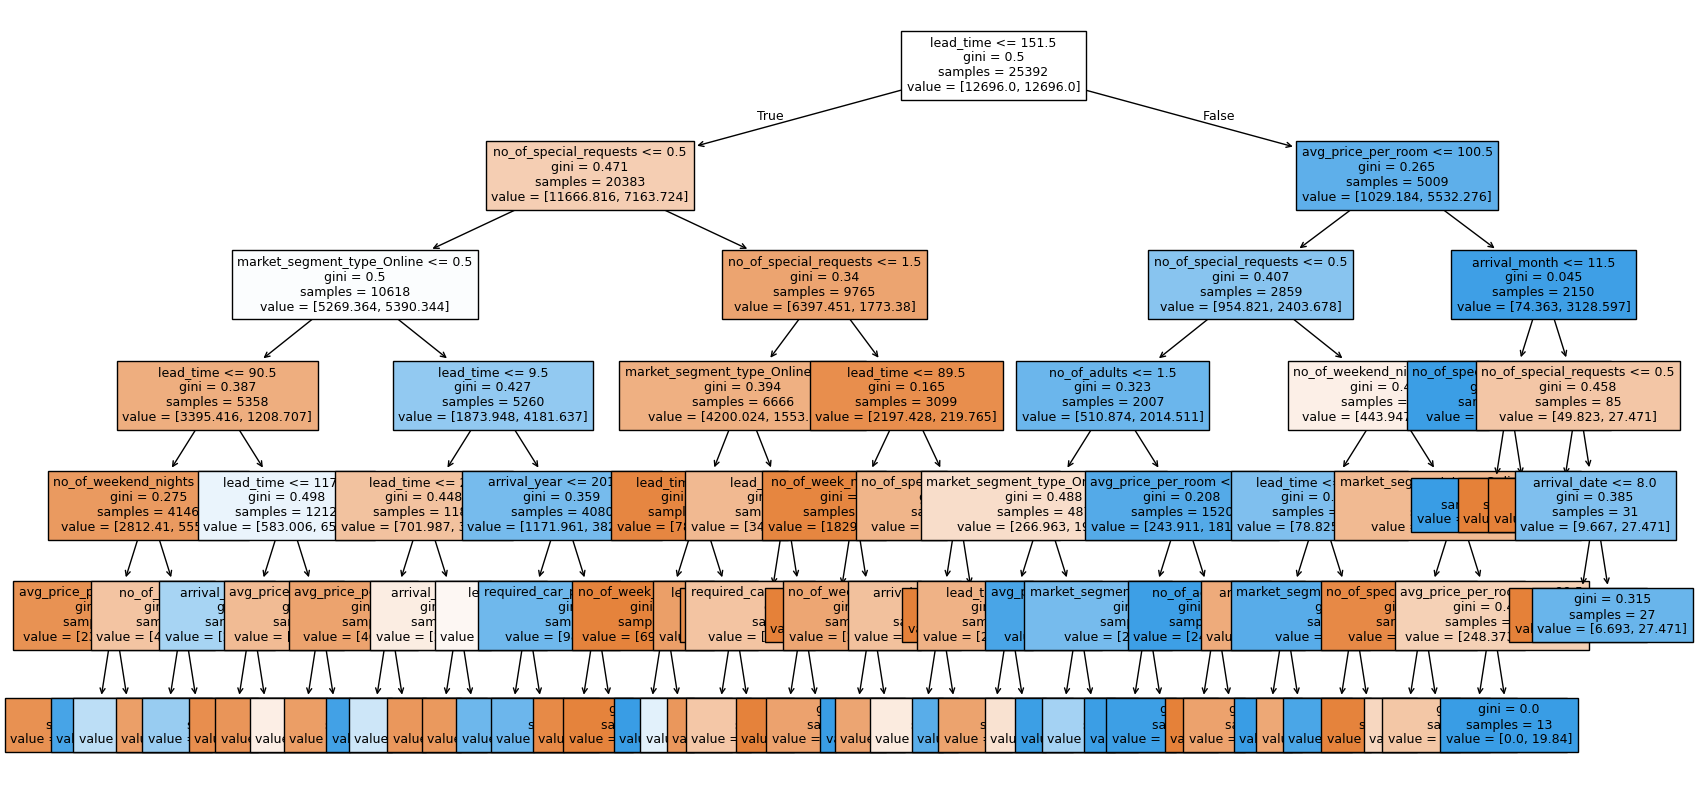

In [951]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [952]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- weights: [2356.56, 293.02] class: 0
|   |   |   |   |   |--- avg_price_per_room >  202.00
|   |   |   |   |   |   |--- weights: [1.49, 21.37] class: 1
|   |   |   |   |--- no_of_weekend_nights >  1.50
|   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |--- weights: [104.11, 157.19] class: 1
|   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |--- weights: [350.25, 83.94] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |--- weights: [245.40, 512.78] class: 1
|   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |--- weights: [43.13, 4.58] class: 0


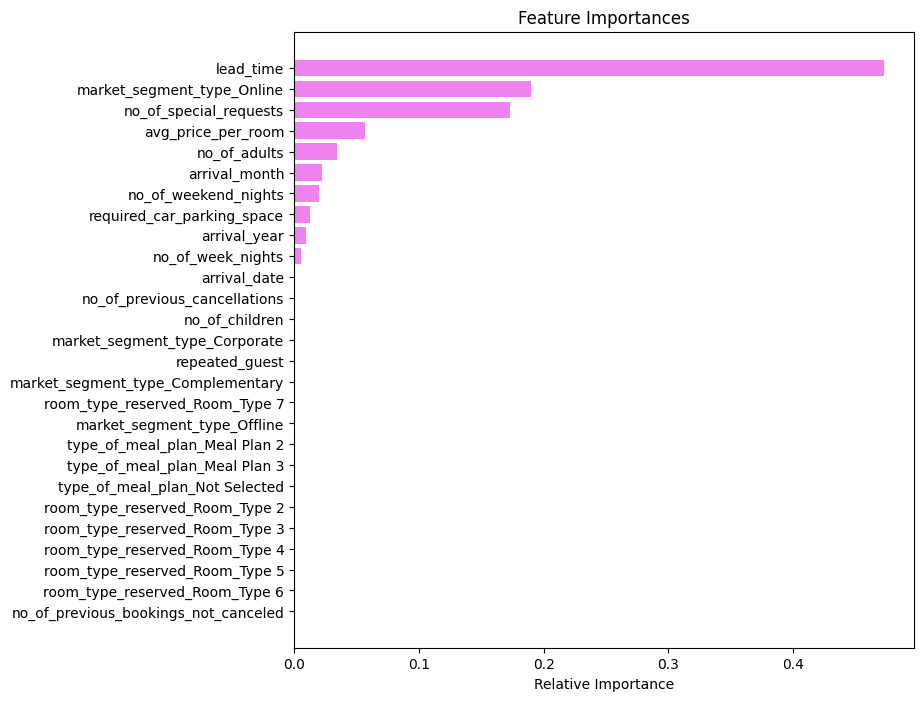

In [953]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations from decision tree:
*We can see that the tree has become simpler and the rules of the trees are readable.
* The model performance of the model has been generalized.
* We observe that the most important features are:
** Lead Time
** Market Segment - Online
**Number of special requests
** Average price per room

The rules obtained from the decision tree can be interpreted as:

* The rules show that lead time plays a key role in identifying if a booking will be cancelled or not. 151 days has been considered as a threshold value by the model to make the first split.

Bookings made more than 151 days before the date of arrival:

* If the average price per room is greater than 100 euros and the arrival month is December, then the the booking is less likely to be cancelled.
* If the average price per room is less than or equal to 100 euros and the number of special request is 0, then the booking is likely to get canceled.

Bookings made under 151 days before the date of arrival:

* If a customer has at least 1 special request the booking is less likely to be cancelled.
* If the customer didn't make any special requests and the booking was done Online it is more likely to get canceled, if the booking was not done online, it is less likely to be canceled.

If we want more complex then we can go in more depth of the tree

## Decision Tree (Post Pruning)

Total impurity of leaves vs efective alphas of prined tree

**Cost Complexity Pruning**

In [954]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [955]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00833
1       -0.00000     0.00833
2        0.00000     0.00833
3        0.00000     0.00833
4        0.00000     0.00833
...          ...         ...
1636     0.00880     0.32791
1637     0.00941     0.33732
1638     0.01253     0.34985
1639     0.03405     0.41794
1640     0.08206     0.50000

[1641 rows x 2 columns]

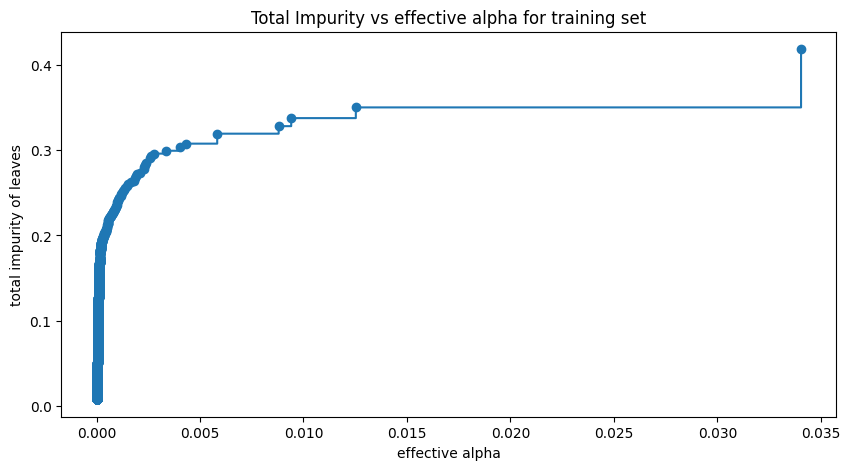

In [956]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [1106]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
  clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.03404622796578144


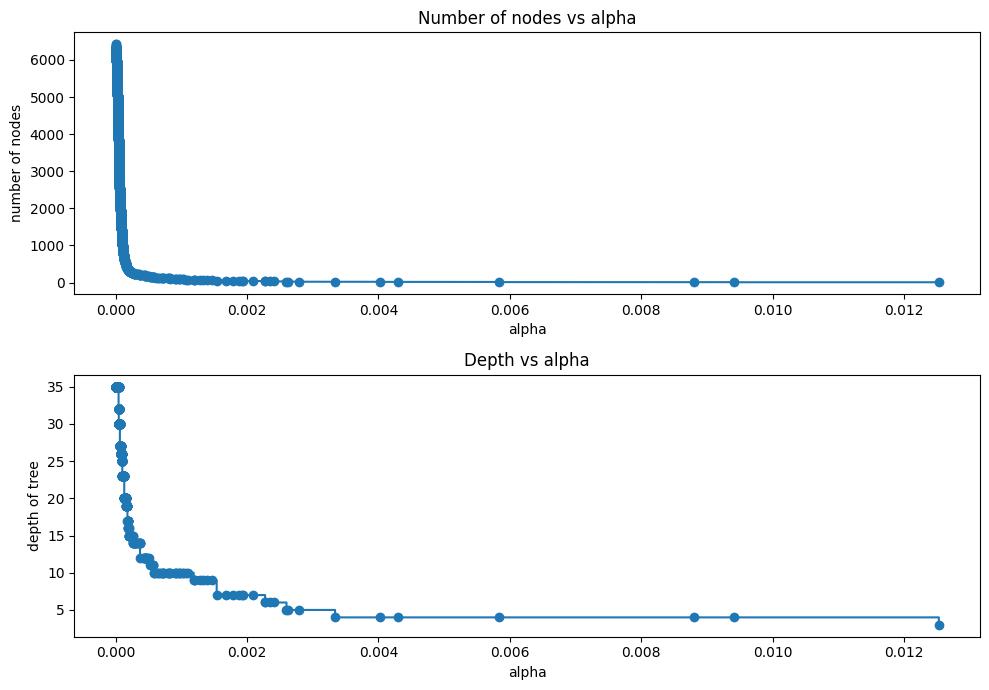

In [1107]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [1108]:
recall_train = [recall_score]
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [1109]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [1110]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

#### F1 Score vs alpha for training and testing sets

In [1112]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

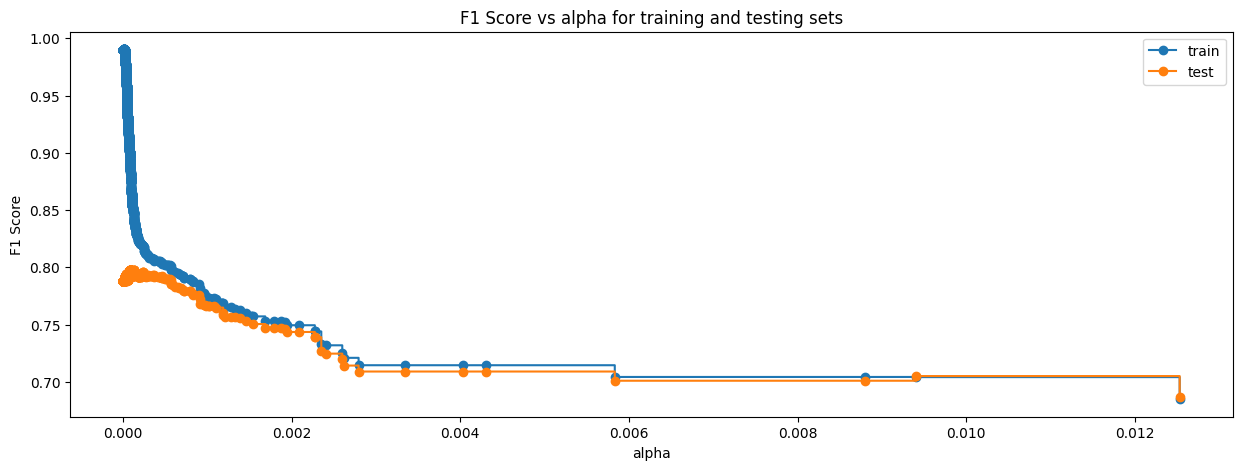

In [1113]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [1114]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=9.207759232287106e-05, class_weight='balanced',
                       random_state=1)


#### Checking performance on training set

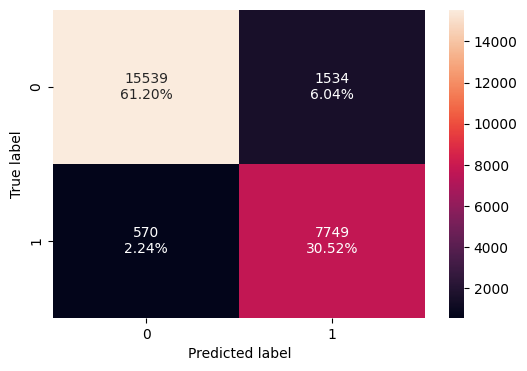

In [1115]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [1116]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.91714 0.93148    0.83475 0.88047

#### Checking performance on test set

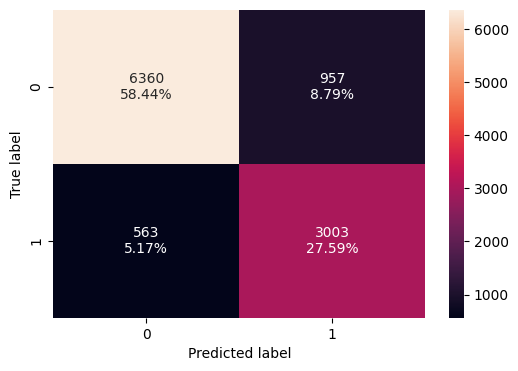

In [1117]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [1118]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

Accuracy  Recall  Precision      F1
0   0.86033 0.84212    0.75833 0.79803

Observations:

* After post pruning the decision tree the performance has generalized on training and test set.
* We are getting high recall with this model but difference between recall and precision has increased.

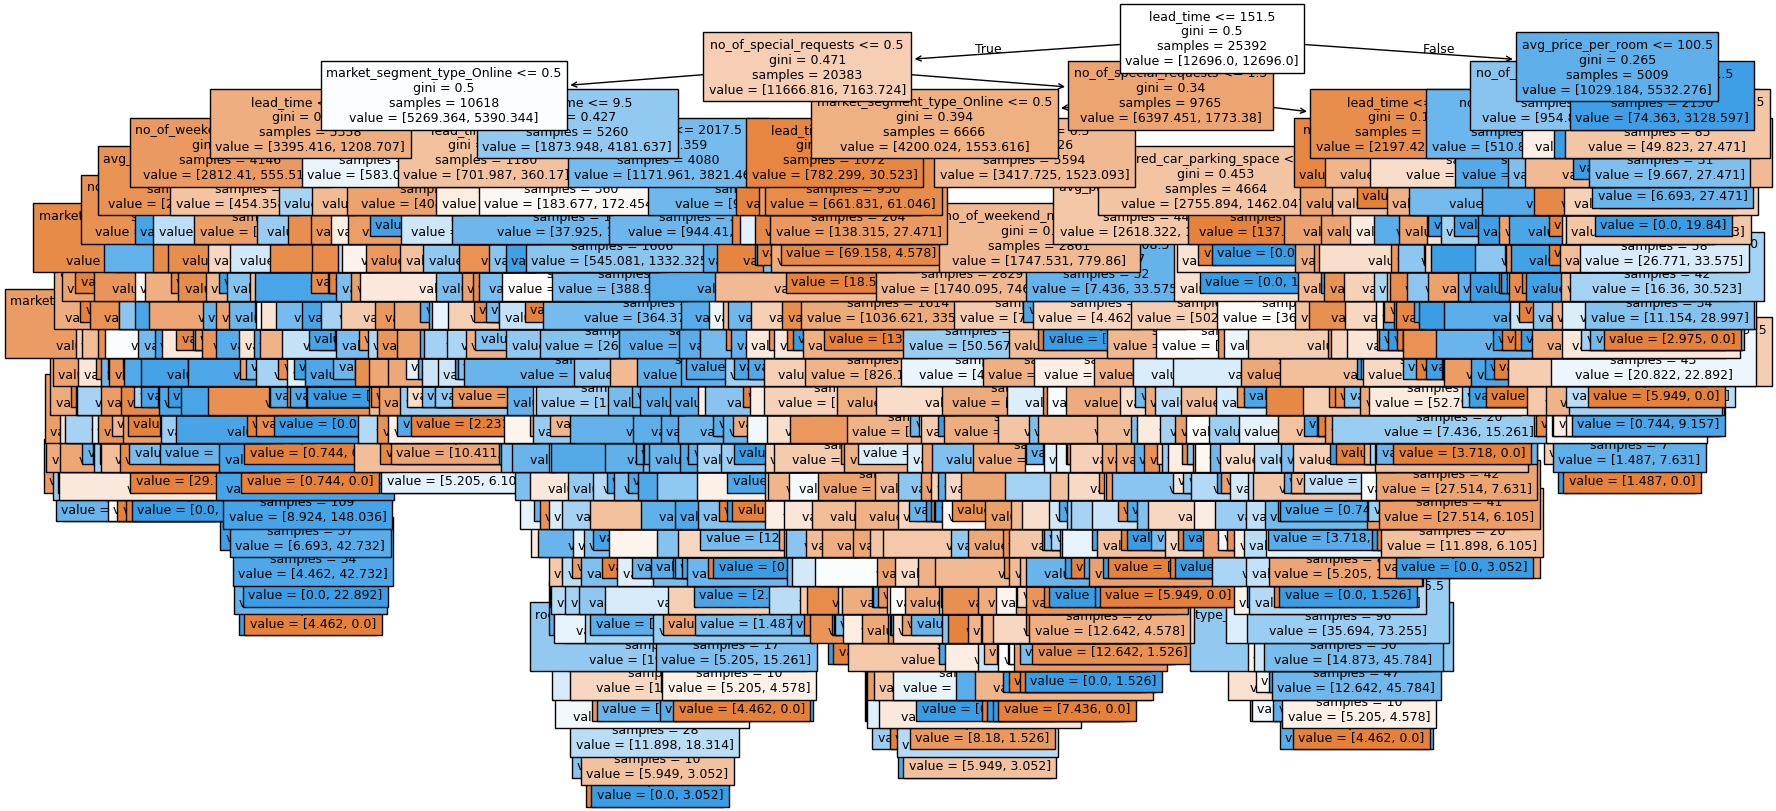

In [1119]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [1120]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 87.00
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [54.29, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  87.00
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |  

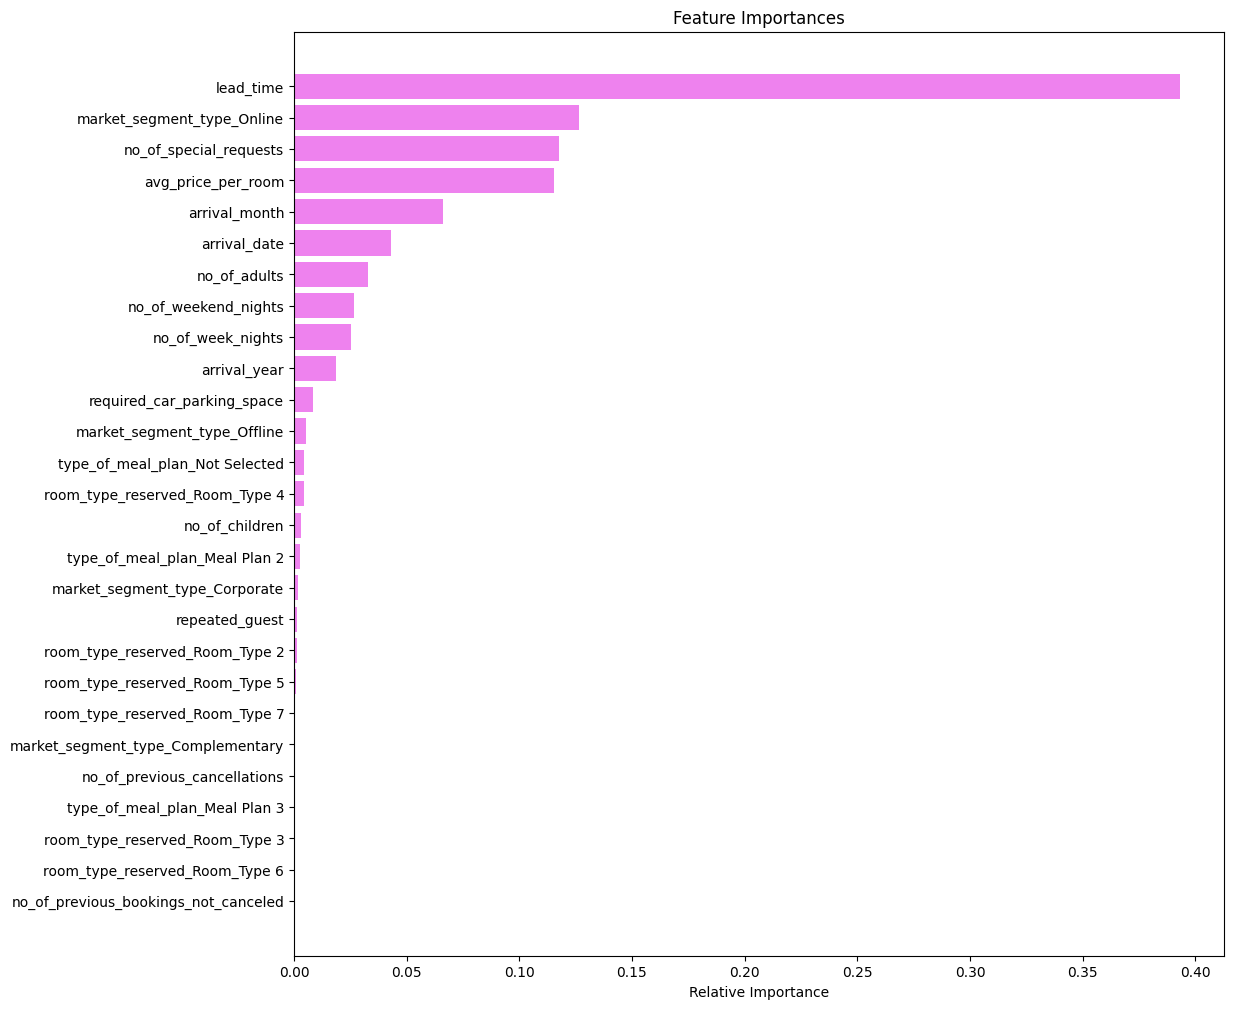

In [1121]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations from tree:

* The tree is quite complex as complex as compared to the pre-pruned tree.
* The feature importance is same as we got in pre-pruned tree.

In [1122]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99437                      0.99437   
Recall                   0.98570                      0.98570   
Precision                0.99708                      0.99708   
F1                       0.99136                      0.99136   

           Decision Tree (Post-Pruning)  
Accuracy                        0.91714  
Recall                          0.93148  
Precision                       0.83475  
F1                              0.88047

In [1123]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.86355                      0.83451   
Recall                   0.79641                      0.77987   
Precision                0.78911                      0.73242   
F1                       0.79274                      0.75540   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86033  
Recall                          0.84212  
Precision                       0.75833  
F1                              0.79803

Observations:

* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Post-pruned tree is giving a high F1 score as compared to other models but the difference between precision and recall is high.
* The hotel will be able to maintain a balance between resources and brand equity using the pre-pruned decision tree model.
* Prepruning training and testing performance data is not in alignmnet, i tried several ways by changing hyperparamaters but could not diagnose it.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?

* Based on the coefficients in the logistic regression models and the features in the decision-tree models, both prediction models provide evidence that INN Hotels should at least consider separate cancellation and refund policies for its guests travelling for business or personal reasons.
* Therefore, the data suggests that introducing a rewards program for business travelers (e.g., requiring more frequent trips, booking on short notice from a corporate sales channel, and directed by corporate travel guidelines to book a room with the lowest available cost) should further incentive these guests to book at INN Hotels and follow-through on their travel plans.
* Additionally, in case a hotel is at capacity or overbooked, management could utilize the model to ensure all repeat guests or guests travelling for business reasons have rooms available. Conversely, management can combine predictions from both models to identify the "most likely case" that a booking will be canceled and reallocate that room to a booking for that room category which is the "least likely case".

- What other recommedations would you suggest to the hotel?

To further improve the utility of the models, the hotel can provide approximations of the costs related to the outcomes corresponding to true/false positives/negatives. Our team can then optimize the models predicitions to achieve the highest expected profits, versus optimizing for F1 score, which we chose for our evaluation criteria based on the client's use-case.